# 3D Vision Homework 1
>王子轩 2023011307
`wang-zx23@mails.tsinghua.edu.cn`
## Probelem 1
### Subproblem 1.1
The map $\textit{f}: \mathbb{R}^n \rightarrow \mathbb{R}^3$ is defined by 
$$
f(u, v) = \begin{bmatrix}
a \cos u \sin v  & \\
b \sin u  \sin v  & \\
c \cos v &  
\end{bmatrix}
\text{where} - \pi \leq u \leq  \pi, \quad 0 \leq v \leq \pi
$$
The function $f$ maps the 2D domain to an ellipsoid.
Let $a = 1$, $b = 1$, $c = \frac{1}{2}$. Let $\mathbf{p} = (u, v)$ be a point in the domain of $f$, and let
$\gamma: (-1, 1) \rightarrow \mathbb{R}^2$ be a curve with $\gamma(0) = \mathbf{p}$ and $\gamma'(t) = \mathbf{v}$.
Now we let $\mathbf{p} = (\frac{\pi}{4}, \frac{\pi}{6})$ and $\mathbf{v} = (1, 0)$, we draw the curve $f(\gamma(t))$.

### Solution:
From $\gamma'(t) = (1, 0)\text{ and } \gamma(0) = (\frac{\pi}{4}, \frac{\pi}{6}) $ we get $\gamma(t) = (\frac{\pi}{4} + t, \frac{\pi}{6}) $, thus $$f(\gamma(t)) = \begin{bmatrix}
\cos(\frac{\pi}{4} + t) \sin(\frac{\pi}{6}) \\
\sin(\frac{\pi}{4} + t) \sin(\frac{\pi}{6}) \\
\frac{1}{2} \cos(\frac{\pi}{6})
\end{bmatrix} $$
>Full code using object oriented programming in Python is in src/draw.py 

>Simpler view of the code is list as follows, and the result can be seen in the image.

![draw ellipsoid and curve](assets/image-20250317220956088.png)

In [7]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
a, b, c = 1, 1, 0.5
p = (np.pi/4, np.pi/6)
v = (1, 0)
vis = o3d.visualization.Visualizer()
vis.create_window(window_name="Ellipsoid with Curve")
u = np.linspace(-np.pi, np.pi, 50)
v = np.linspace(0, np.pi, 25)
u_grid, v_grid = np.meshgrid(u, v)
x = a * np.cos(u_grid) * np.sin(v_grid)
y = b * np.sin(u_grid) * np.sin(v_grid)
z = c * np.cos(v_grid)
vertices = []
for i in range(len(v)):
    for j in range(len(u)):
        vertices.append([x[i, j], y[i, j], z[i, j]])
vertices = np.array(vertices)

triangles = []
for i in range(len(v)-1):
    for j in range(len(u)-1):
        idx1 = i * len(u) + j
        idx2 = i * len(u) + (j + 1)
        idx3 = (i + 1) * len(u) + j
        idx4 = (i + 1) * len(u) + (j + 1)
        triangles.append([idx1, idx2, idx3])
        triangles.append([idx2, idx4, idx3])
triangles = np.array(triangles)

mesh = o3d.geometry.TriangleMesh()
mesh.vertices = o3d.utility.Vector3dVector(vertices)
mesh.triangles = o3d.utility.Vector3iVector(triangles)
mesh.compute_vertex_normals()
mesh.paint_uniform_color([0.8, 0.8, 0.8]) 

mesh_wireframe = o3d.geometry.LineSet.create_from_triangle_mesh(mesh)
mesh_wireframe.paint_uniform_color([0.5, 0.5, 0.5])  

t_values = np.linspace(-1, 1, 100)
curve_points = []

for t in t_values:
    u_t = np.pi/4 + t
    v_t = np.pi/6
    x_t = a * np.cos(u_t) * np.sin(v_t)
    y_t = b * np.sin(u_t) * np.sin(v_t)
    z_t = c * np.cos(v_t)
    
    curve_points.append([x_t, y_t, z_t])

curve_points = np.array(curve_points)

line_indices = [[i, i+1] for i in range(len(curve_points)-1)]
line_set = o3d.geometry.LineSet()
line_set.points = o3d.utility.Vector3dVector(curve_points)
line_set.lines = o3d.utility.Vector2iVector(line_indices)
line_set.colors = o3d.utility.Vector3dVector([[1, 0, 0] for _ in range(len(line_indices))])  # Red color

coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=[0, 0, 0])

vis.add_geometry(mesh)
vis.add_geometry(mesh_wireframe)  
vis.add_geometry(line_set)
vis.add_geometry(coordinate_frame)  

opt = vis.get_render_option()
opt.background_color = np.array([1, 1, 1])  
opt.point_size = 5.0
opt.mesh_show_wireframe = True  

vis.run()
vis.destroy_window()

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(curve_points)
pcd.paint_uniform_color([0, 1, 0]) 

sample_points = mesh.sample_points_uniformly(number_of_points=3000)
sample_points.paint_uniform_color([0, 0, 0.8])  

o3d.visualization.draw_geometries([mesh, mesh_wireframe, pcd, coordinate_frame, sample_points], 
                                 window_name="Ellipsoid with Curve Points",
                                 mesh_show_wireframe=True)

KeyboardInterrupt: 

### Subproblem 1.2
Differential map: The differential of a function f at a point p is a linear
map. Equivalent to how we define the differential in class, we can also
define by the gradient of the curve w.r.t. the curve parameter: $Df_{\mathbf{p}(v)} =
f(γ(t))′|t=0.$
### Solution:
#### (a) $Df_{\mathbf{p}(v)}$'s expression:
$Df_{\mathbf{p}(v)} = f(γ(t))′|t=0 = ( f \circ \gamma)'(t)  = f'(\gamma(t)) \gamma'(t) |t=0 = (\frac{\partial f}{\partial \mathbf{p}}) \mathbf{v} = \nabla f \mathbf{v}  
=  (\frac{\partial f}{\partial u}, \frac{\partial f}{\partial v}) \mathbf{v}$ 
thus
$$ 
Df_{\mathbf{p}} 
= 
\begin{bmatrix}
\frac{\partial f}{\partial u} & \frac{\partial f}{\partial v}
\end{bmatrix}
= \begin{bmatrix}
-a\sin u \sin v & a\cos u \cos v \\
b\cos u \sin v & b\sin u \cos v \\
0 & -c\sin v
\end{bmatrix}
= 
\begin{bmatrix}
-\sin u \sin v & \cos u \cos v \\
\cos u \sin v & \sin u \cos v \\
0 & -\frac{1}{2}\sin v
\end{bmatrix}
$$
#### (b) Describe the geometry meaning of the differential map
The differential map $Df_{\mathbf{p}}$ is a linear map that provides the linear approximation of $f$ near point $\mathbf{p}$. It maps 2D tangent space from the input space to the 3D tangent output space, showing how local directions change under the differential map. For example if a point moves at $\mathcal{p}$ by  the velocity of $\mathcal{v}$ in the input space, $Df_{\mathbf{p}}(v)$ represents the velocity of its image point $f_p$ at that in the output space.
#### (c) Draw $\mathcal{Df_p(v)}$ on the ellipsoid
$\mathbf{p}=( \frac{π}{4}, \frac{π}{6}) and \mathbf{v} = (1, 0)$ and we konw that 
$Df_{\mathbf{p}} =
\begin{bmatrix}
-\sin u \sin v & \cos u \cos v \\
\cos u \sin v & \sin u \cos v \\
0 & -\frac{1}{2}\sin v
\end{bmatrix}$ Thus 
$$
Df_{\mathbf{p}} \mathbf{v} 
= \begin{bmatrix}
-\sin u \sin v & \cos u \cos v \\
\cos u \sin v & \sin u \cos v \\
0 & -\frac{1}{2}\sin v
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
= 
\begin{bmatrix}
-\sin u \sin v \\
\cos u \sin v \\
0
\end{bmatrix}
$$
The implemention of full code is in `src/draw.py`, and the class `DifferentialMap` is used to draw the $D_f(v)$ in both directions of the tangent plane.
Run `! python draw.py` you can see the result that the $D_f(v)$ is drawn in both directions of the tangent plane. The Red arrow is the direction of $\mathbf{v} = (1,0)$ and the Blue arrow is the direction of $\mathbf{v} = (0, 1)$.  In the following image, the Red arrow is the direction of $\mathbf{v} = (1,0)$ and the Blue arrow is the direction of $\mathbf{v} = (0, 1)$. See the first image(a):
a
![a](assets\image-20250318001837911.png)

c![c](assets\image-20250318002530291.png)

>Implementation code for the $\mathcal{Df_p}$

```python
class DifferentialMap:
    def __init__(self, ellipsoid, u, v):
        self.ellipsoid = ellipsoid
        self.u = u
        self.v = v
        
    def compute_dfp(self):
        """Calculate Df_p @ (u,v)"""
        a, b, c = self.ellipsoid.a, self.ellipsoid.b, self.ellipsoid.c
        u, v = self.u, self.v
        dfp = np.array([
            [-a * np.sin(u) * np.sin(v), a * np.cos(u) * np.cos(v)],
            [b * np.cos(u) * np.sin(v), b * np.sin(u) * np.cos(v)],
            [0, -c * np.sin(v)]
        ])
        return dfp
    
    def apply_dfp_to_vector(self, v_direction):
        """Apply Df_p to a specific direction vector v"""
        dfp = self.compute_dfp()
        v_direction = np.array(v_direction)
        v_direction = v_direction / np.linalg.norm(v_direction)
        result = dfp @ v_direction
        return result
    
    def create_differential_vector(self, v_direction, scale=0.2, color=[1, 0, 0]):
        """Create a visualization of Df_p(v) for a specific direction v"""
        x = self.ellipsoid.a * np.cos(self.u) * np.sin(self.v)
        y = self.ellipsoid.b * np.sin(self.u) * np.sin(self.v)
        z = self.ellipsoid.c * np.cos(self.v)
        base_point = np.array([x, y, z])
        direction = self.apply_dfp_to_vector(v_direction)
        direction = direction / np.linalg.norm(direction) * scale
        cylinder = o3d.geometry.TriangleMesh.create_cylinder(
            radius=0.01,
            height=np.linalg.norm(direction)
        )
        cone = o3d.geometry.TriangleMesh.create_cone(
            radius=0.02,
            height=0.05
        )
        z_axis = np.array([0, 0, 1])
        if not np.allclose(direction, z_axis) and not np.allclose(direction, -z_axis):
            rotation_axis = np.cross(z_axis, direction)
            rotation_axis = rotation_axis / np.linalg.norm(rotation_axis)
            angle = np.arccos(np.dot(z_axis, direction/np.linalg.norm(direction)))
            R = o3d.geometry.get_rotation_matrix_from_axis_angle(rotation_axis * angle)
            cylinder.rotate(R, center=[0, 0, 0])
            cone.rotate(R, center=[0, 0, 0])
        cylinder.translate(base_point + direction/2)
        cone.translate(base_point + direction)
        cylinder.paint_uniform_color(color)
        cone.paint_uniform_color(color)
        return [cylinder, cone]
    
    def create_differential_vectors(self, scale=0.2, directions=None):
        """Create visualizations for multiple direction vectors"""
        if directions is None:
            # Default: standard basis vectors
            directions = [
                ([1, 0], [1, 0, 0]),  # u direction, red color
                ([0, 1], [0, 0, 1])   # v direction, blue color
            ]
        arrows = []
        for v_dir, color in directions:
            arrow_parts = self.create_differential_vector(v_dir, scale, color)
            arrows.extend(arrow_parts)
        
        return arrows
```

In [ ]:
python src/draw.py

Traceback (most recent call last):
  File "e:\project\3DV\PAs\PA1\src\draw.py", line 446, in <module>
    ParameterLoader.save_to_file(default_params, config_file)
  File "e:\project\3DV\PAs\PA1\src\draw.py", line 60, in save_to_file
    with open(file_path, 'w') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'e:\\project\\3DV\\PAs\\Homework 1\\ellipsoid_config.json'


#### (d) Calculate the normal vector of tagent plane at point $p$.
$$
N(u, v) = \frac{f_u \times f_v}{\| f_u \times f_v \|}\\
 \text{where} f_u = \frac{\partial f}{\partial u} \quad  f_v = \frac{\partial f}{\partial v}
$$
From 
$$
\mathbf{p} = (\frac{\pi}{4},\frac{\pi}{6}), \quad f_u 
= \begin{bmatrix}
-\sin u \sin v\\
\cos u \sin v  \\
0
\end{bmatrix}
f_v = \begin{bmatrix}
\cos u \cos v \\
\sin u \cos v \\
-\frac{1}{2} \sin v
\end{bmatrix}
$$ 
we have 
$f_u \times f_v = \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
-\sin u \sin v & \cos u \sin v & 0 \\
\cos u \cos v & \sin u \cos v & -\frac{1}{2} \sin v
\end{vmatrix}$

$= \begin{bmatrix}
-\frac{1}{2}\cos u \sin^2 v \
-\frac{1}{2}\sin u \sin^2 v \
-\sin v \cos v
\end{bmatrix}$

$u = \frac{\pi}{4}, v = \frac{\pi}{6}$：

$f_u \times f_v = \begin{bmatrix}
-\frac{1}{2}\frac{\sqrt{2}}{2} \cdot (\frac{1}{2})^2 \
-\frac{1}{2}\frac{\sqrt{2}}{2} \cdot (\frac{1}{2})^2 \
-\frac{1}{2} \cdot \frac{\sqrt{3}}{2}
\end{bmatrix} = \begin{bmatrix}
-\frac{\sqrt{2}}{16} \
-\frac{\sqrt{2}}{16} \
-\frac{\sqrt{3}}{4}
\end{bmatrix}$
$|f_u \times f_v| = \sqrt{(\frac{\sqrt{2}}{16})^2 + (\frac{\sqrt{2}}{16})^2 + (\frac{\sqrt{3}}{4})^2}$
$= \sqrt{\frac{1}{64} + \frac{1}{128} + \frac{3}{16}}$
$= \sqrt{\frac{1}{64} + \frac{12}{64}}$
$= \sqrt{\frac{13}{64}} = \frac{\sqrt{13}}{8}$

However, we need to orient the closed surface outward.
Thus


$N_{(\frac{\pi}{4},\frac{\pi}{6})} = \begin{bmatrix}
\frac{\sqrt{2}}{16} \\
\frac{\sqrt{2}}{16} \\
\frac{\sqrt{3}}{4}
\end{bmatrix} \cdot \frac{8}{\sqrt{13}} = \begin{bmatrix}
\frac{\sqrt{2}}{2\sqrt{13}} \\
\frac{\sqrt{2}}{2\sqrt{13}} \\
\frac{2\sqrt{3}}{\sqrt{13}}
\end{bmatrix}
= [0.19611162,0.19611162, 0.96076892]^T$
How
#### (e) Give a group of orthonormal bases of the tangent space at $f(p)$ and draw it.
Actually, at (c) I have got the orthonormal bases of the tangent space at $f(p)$, that is $\mathcal{D_f((0, 1))}$ and $\mathcal{D_f((1, 0))}$.

b![b](assets\image-20250318000822800.png)



### Subproblem 1.3
Given $ p = \left( \frac{\pi}{4}, \frac{\pi}{6} \right) $ and $ v = (1, 0) $. For simplicity, let $ g_v(t) = f(\gamma(t)) $ denote the curve which passes through $ p $ at $ t = 0 $.
### Solution
#### (a) What is the arc length $ s(t) $ as the point moves from $ g_v(0) $ to $ g_v(t) $?

$$
s(t) = \int_0^t \|g_v'(t)\| dt = \int_0^t \|f'(\gamma(t))\| \nabla \gamma(t) dt = \int_0^t \|f'(\gamma(t))\| \mathbf{v} dt\\
= \int_0^t \|[-\sin u \sin v, \cos u \sin v, 0]^T\| dt
= \int_0^t |\sin v\| dt
= \frac{1}{2} t\\
$$
#### (b) Give the arc-length parametrization $ h_v(s) $ of the curve.
$$
h_v(s) = g_v(t(s)) = g_v(2s) = f(\gamma(2s)) = \\
[\frac{1}{2}\cos (\frac{\pi}{4} + 2s), \frac{1}{2}\sin (\frac{\pi}{4} + 2s), \frac{\sqrt{3}}{4}]^T
$$
#### (c) What is the normal vector of the curve at a point $ h_v(s) $? Hint: Use $ h_v(s) $ to derive the normal.
By the relation of normal of tangent vector of a curve $N(s) = \frac{T'(s)}{\|T'(s)\|}$, we can derive that:
$$
T(s) = h_v'(s) = [-\sin (\frac{\pi}{4} + 2s) \cos (\frac{\pi}{4} + 2s), 0]^T\\
T'(s) = [-2 \cos (\frac{\pi}{4} + 2s), -2\sin (\frac{\pi}{4} + 2s), 0]^T\\
N(s) = \frac{T'(s)}{\|T'(s)\|} = [- \cos (\frac{\pi}{4}+ 2s), - \sin( \frac{\pi}{4}+ 2s), 0 ]^T
$$

### Subproblem 1.4
Curvature: In 2(d), you have computed the normal at **p**. Denote this normal as $N_p$.
### Solution

#### (a) Compute the differential of the normal $DN_p$, and express it as a matrix. 
From 
$$
N_p =
\begin{bmatrix}
\frac{1}{2}\cos u \sin^2 v \\
\frac{1}{2}\sin u \sin^2 v \\
\sin v \cos v
\end{bmatrix}
$$
By normalization:
$$
\hat N_p =
\frac{N_p}{\|N_p\|} =
\frac{-1}{\sqrt{\sin^2 v + 4\cos^2 v}} 
\begin{bmatrix}
\cos u \sin v\\
\sin u \sin v\\
2 \cos v
\end{bmatrix} \\
DN_p =  - [\frac{\partial \hat N_p}{\partial u}, \frac{\partial \hat N_p}{\partial v}]
=
- \begin{bmatrix}
\frac{\sin(u)\sin(v)}{\sqrt{\sin^2(v) + 4\cos^2(v)}} & -\frac{4\cos(u)\cos(v)}{(\sin^2(v) + 4\cos^2(v))^{3/2}},
 \\
-\frac{\cos(u)\sin(v)}{\sqrt{\sin^2(v) + 4\cos^2(v)}} & -\frac{4\sin(u)\cos(v)}{(\sin^2(v) + 4\cos^2(v))^{3/2}},
\\
0 & \frac{2\sin(v)}{(\sin^2(v) + 4\cos^2(v))^{3/2}}
\end{bmatrix} \in \mathbb{R}^{3 \times 2}
$$


#### (b) Find the eigenvectors of the shape operator at **p**.

From 
$$
Df_{\mathbf{p}} 
= 
\begin{bmatrix}
\frac{\partial f}{\partial u} & \frac{\partial f}{\partial v}
\end{bmatrix}
= \begin{bmatrix}
-a\sin u \sin v & a\cos u \cos v \\
b\cos u \sin v & b\sin u \cos v \\
0 & -c\sin v
\end{bmatrix}
= 
\begin{bmatrix}
-\sin u \sin v & \cos u \cos v \\
\cos u \sin v & \sin u \cos v \\
0 & -\frac{1}{2}\sin v
\end{bmatrix}
$$
And from the definition of the shape operator: 
$$
DN_{\mathbf{p}} = Df_{\mathbf{p}} S
$$
As the matrix $ Df_{\mathbf{p}} $ is not a square matrix, we use the pseudo-inverse of $Df_{\mathbf{p}}$:
$S = (Df_{\mathbf{p}}^T Df_{\mathbf{p}})^{-1} Df_{\mathbf{p}}^T DN_{\mathbf{p}}$
$$
Df_{\mathbf{p}}^T =
\begin{bmatrix}
-\sin u \sin v & \cos u \sin v & 0 \\
\cos u \cos v & \sin u \cos v & -\frac{1}{2}\sin v
\end{bmatrix}\\
Df_{\mathbf{p}}^T Df_{\mathbf{p}} =
\begin{bmatrix}
\sin^2 v & 0 \\
0 & \cos^2 v + \frac{1}{4}\sin^2 v
\end{bmatrix}\\
(Df_{\mathbf{p}}^T Df_{\mathbf{p}})^{-1} =
\begin{bmatrix}
\frac{1}{\sin^2 v} & 0 \\
0 & \frac{1}{\cos^2 v + \frac{1}{4}\sin^2 v}
\end{bmatrix}\\
S = (Df_{\mathbf{p}}^T Df_{\mathbf{p}})^{-1} Df_{\mathbf{p}}^T DN_{\mathbf{p}}
$$
$$
S = (Df_{\mathbf{p}}^T Df_{\mathbf{p}})^{-1} Df_{\mathbf{p}}^T DN_{\mathbf{p}} = 
\begin{bmatrix}
\frac{1}{\sqrt{\sin^2 v + 4\cos^2 v}} & 0 \\
0 & \frac{4}{(\sin^2 v + 4\cos^2 v)^{3/2}}
\end{bmatrix}
$$
We can derive that $S$ is diagonal, and its eigenvectors are $[0, 1]^T, [1, 0]$, which means the principal curvature directions are $[0, 1]^T, [1, 0]$.

#### (c) [Programming Assignment] Draw the two principal curvature directions in the tangent plane of the ellipsoid **p**
Actually I have done this in the previous question, and the result is shown in the figure below:
b![b](assets\image-20250318000822800.png) but you can also run the following code to get the result:

In [ ]:
import numpy as np
import open3d as o3d
from src.draw import Ellipsoid, DifferentialMap

def draw_principal_curvature_directions():
    ellipsoid = Ellipsoid(a=1, b=1, c=0.5)
    mesh = ellipsoid.generate_surface()
    mesh.paint_uniform_color([0.8, 0.8, 0.8])
    wireframe = ellipsoid.get_wireframe()
    wireframe.paint_uniform_color([0.5, 0.5, 0.5])
    u, v = np.pi/4, np.pi/6
    x = ellipsoid.a * np.cos(u) * np.sin(v)
    y = ellipsoid.b * np.sin(u) * np.sin(v)
    z = ellipsoid.c * np.cos(v)
    point = np.array([x, y, z])
    point_cloud = o3d.geometry.PointCloud()
    point_cloud.points = o3d.utility.Vector3dVector([point])
    point_cloud.paint_uniform_color([1, 0, 0]) 
    diff_map = DifferentialMap(ellipsoid, u, v)
    principal_directions = [
        ([1, 0], [1, 0, 0]),  
        ([0, 1], [0, 0, 1])   
    ]
    arrows = diff_map.create_differential_vectors(scale=0.3, directions=principal_directions)
    coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=[0, 0, 0])
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name="Principal Curvature Directions")
    vis.add_geometry(mesh)
    vis.add_geometry(wireframe)
    vis.add_geometry(point_cloud)
    vis.add_geometry(coordinate_frame)
    for arrow in arrows:
        vis.add_geometry(arrow)
    opt = vis.get_render_option()
    opt.background_color = np.array([1, 1, 1])  
    opt.point_size = 10.0  
    vis.run()
    vis.destroy_window()

if __name__ == "__main__":
    draw_principal_curvature_directions()

![](assets\2025-03-21-172541.png)

#### (d) Compute the Gaussian curvature of the surface **f** at **p** = ($\frac{\pi}{4}, \frac{\pi}{6}$), and demonstrate that ellipsoid **f** doesn’t show isometric invariance with any spherical surface.

From
$$
S = 
\begin{bmatrix}
\frac{1}{\sqrt{\sin^2 v + 4\cos^2 v}} & 0 \\
0 & \frac{4}{(\sin^2 v + 4\cos^2 v)^{3/2}}
\end{bmatrix}
$$
we get
$$
\lambda_1 = \frac{1}{\sqrt{\sin^2 v + 4\cos^2 v}}\\
\lambda_2 = \frac{4}{(\sin^2 v + 4\cos^2 v)^{3/2}}\\
K = \lambda_1 * \lambda_2 = \frac{4}{(\sin^2 v + 4\cos^2 v)^2}
$$
At $p = (\frac{\pi}{4}, \frac{\pi}{6})$
$$
K = \frac{4}{(\sin^2 \frac{\pi}{4} + 4\cos^2 \frac{\pi}{4})^2} = \frac{64}{169}
$$
From Gauss's Theorema Egregium, we know that the Gaussian curvature of an embedded smooth surface in $ \mathbb{R}^3 $ is invariant under local isometries. For the ellipsoid $ \mathbf{f} $, the Gaussian curvature is computed as $ K = \frac{4}{(\sin^2 v + 4\cos^2 v)^2} $, which explicitly depends on the parameter $ v $. At $ \mathbf{p} = (\frac{\pi}{4}, \frac{\pi}{6}) $, substituting $ v = \frac{\pi}{6} $, we find $ K = \frac{64}{169} $. However, this curvature is non-constant across the surface: for instance, at $ v = 0 $, $ K = \frac{1}{4} $, and at $ v = \frac{\pi}{2} $, $ K = 4 $. In contrast, any spherical surface has constant Gaussian curvature $ \frac{1}{R^2} $ determined solely by its radius $ R $. Since local isometries preserve Gaussian curvature invariantly, the ellipsoid’s variable curvature directly contradicts the sphere’s constant curvature, proving that no isometric equivalence can exist between them.


## Probelm 2
### Subproblem 2.1
### Solution
Given mesh saddle.obj, sample 100K points uniformly on the surface. You may use a library(such as Trimesh or Open3d) to do it
You can see the result in the following figure which is the output plt file visualized in Blender:
![](assets/saddle.png)
And also the result after the code runs:
![](assets/saddle-python.png)


In [ ]:
import open3d as o3d
import numpy as np
import os
import trimesh
result_dir = "e:/project/3DV/PAs/PA1/result"
mesh_path = "e:/project/3DV/PAs/PA1/saddle.obj"
quad_mesh = trimesh.load(mesh_path)
tri_mesh = trimesh.load(mesh_path, process=True, force='mesh')
mesh = o3d.geometry.TriangleMesh()
mesh.vertices = o3d.utility.Vector3dVector(np.asarray(tri_mesh.vertices))
mesh.triangles = o3d.utility.Vector3iVector(np.asarray(tri_mesh.faces))
print(f"Number of triangles: {len(mesh.triangles)}")
print(f"Number of vertices: {len(mesh.vertices)}")
mesh.compute_vertex_normals()
pcd = mesh.sample_points_uniformly(number_of_points=100000)
o3d.visualization.draw_geometries([pcd], window_name="Sampled Points")
points = np.asarray(pcd.points)
points = points[:, [0, 2, 1]]  # exchange y and z to see in the Blender
pcd.points = o3d.utility.Vector3dVector(points)
pcd_path = os.path.join(result_dir, "sampled_points.ply")
o3d.io.write_point_cloud(pcd_path, pcd)

Number of triangles: 1352
Number of vertices: 729


True

### Subproblem 2.2 
Use the iterative farthest point sampling method to sample 4K points from the 100K uniform samples. This algorithm is required to be implemented by yourself. You may only use computation libraries such as Numpy and Scipy.
### Solution
The sampling result is shown in the figure below.
![fps1](assets/fps-saddle.png)
![fps2](assets/fps-blender.png)


In [ ]:
import numpy as np
import os
def fps(points, n_samples):
    n_points = len(points)
    distances = np.full(n_points, np.inf)
    indices = np.zeros(n_samples, dtype=np.int32)
    indices[0] = np.random.randint(n_points)
    for i in range(1, n_samples):
        last_point = points[indices[i-1]]
        dist = np.sum((points - last_point) ** 2, axis=1)
        distances = np.minimum(distances, dist)
        indices[i] = np.argmax(distances)
    return points[indices]
import open3d as o3d
import os
pcd_path = "e:/project/3DV/PAs/PA1/result/sampled_points.ply"
pcd = o3d.io.read_point_cloud(pcd_path)
points = np.asarray(pcd.points)
sampled_points = fps(points, 4000)
fps_pcd = o3d.geometry.PointCloud()
fps_pcd.points = o3d.utility.Vector3dVector(sampled_points)
# fps_pcd.paint_uniform_color([1, 0, 0])  
fps_pcd_path = os.path.join(os.path.dirname(pcd_path), "fps_sampled_points.ply")
o3d.io.write_point_cloud(fps_pcd_path, fps_pcd)
o3d.visualization.draw_geometries([fps_pcd], window_name="FPS Sampling Result")

### Subproblem 2.3
Normal estimation: At each point of the 4K points, estimate the normal vector by Principal Component Analysis using 50 nearest neighbors from the 100K uniform points(You can use sklearn.decomposition.PCA).
Since making the direction of normals consistent is a non-trivial task, for this assignment, you can orient the normals so that they roughly points in the Y direction.
>Note 1: You can use sklearn.neighbors.KDTree to efficiently extract nearest neighbors.

>Note 2: We also provide a saddle point cloud saddle.ply with point
outliers. You can try integrating denoising algorithms (e.g. RANSAC) to
improve the robustness of your method.
### Solution
As the following figure shows, the normals are roughly aligned with the Z direction.(Attention: Because in the previous PA, I exchange the Y and Z axis to match to Blender)
![](assets/saddle-normal.png)

In [ ]:
import numpy as np
import open3d as o3d
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree

def estimate_normals(points, n_neighbors=50):
    original_pcd = o3d.io.read_point_cloud("e:/project/3DV/PAs/PA1/result/sampled_points.ply")
    original_points = np.asarray(original_pcd.points)
    tree = KDTree(original_points)
    pca = PCA(n_components=3)
    normals = np.zeros_like(points)
    for i in range(len(points)):
        distances, indices = tree.query(points[i:i+1], k=n_neighbors)
        neighbors = original_points[indices[0]]
        pca.fit(neighbors)
        normal = pca.components_[-1] 
        
        if normal[2] < 0:  
            normal = -normal
            
        normals[i] = normal
    
    return normals

fps_pcd = o3d.io.read_point_cloud("e:/project/3DV/PAs/PA1/result/fps_sampled_points.ply")
fps_points = np.asarray(fps_pcd.points)
normals = estimate_normals(fps_points)
pcd_with_normals = o3d.geometry.PointCloud()
pcd_with_normals.points = o3d.utility.Vector3dVector(fps_points)
pcd_with_normals.normals = o3d.utility.Vector3dVector(normals)
o3d.visualization.draw_geometries([pcd_with_normals], 
                                window_name="Point Cloud with Normals",
                                point_show_normal=True,
                                width=800, height=600)
o3d.io.write_point_cloud("e:/project/3DV/PAs/PA1/result/fps_points_with_normals.ply", 
                        pcd_with_normals)

True

Use the saddle.ply provided and RANSAC method to Rubust the outliers.
The following picture shows the noisy point cloud.
![](assets/noisy-saddle.png)

If we implement the above **non-RANSAC** algorithm, the result will be like this:
![](assets/noisy_normal.png)

In [ ]:
import numpy as np
import open3d as o3d
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
from joblib import Parallel, delayed

def estimate_normal_ransac_for_point(point, points, tree, n_neighbors, n_iterations, distance_threshold, min_inliers):
    distances, indices = tree.query([point], k=n_neighbors)
    neighbors = points[indices[0]]

    best_normal = None
    max_inliers = 0
    for _ in range(n_iterations):
        sample_indices = np.random.choice(len(neighbors), 3, replace=False)
        sample_points = neighbors[sample_indices]
        pca = PCA(n_components=3)
        pca.fit(sample_points)
        normal = pca.components_[-1]
        center = np.mean(sample_points, axis=0)
        distances = np.abs(np.dot(neighbors - center, normal))

        inliers = np.sum(distances < distance_threshold)

        if inliers > max_inliers:
            max_inliers = inliers
            best_normal = normal
    if max_inliers >= min_inliers:
        center = np.mean(neighbors, axis=0)
        distances = np.abs(np.dot(neighbors - center, best_normal))
        inlier_mask = distances < distance_threshold
        inlier_points = neighbors[inlier_mask]

        if len(inlier_points) >= 3:
            pca = PCA(n_components=3)
            pca.fit(inlier_points)
            best_normal = pca.components_[-1]

    if best_normal is not None:
        if best_normal[1] < 0:
            best_normal = -best_normal
        return best_normal
    else:
        pca = PCA(n_components=3)
        pca.fit(neighbors)
        normal = pca.components_[-1]
        if normal[1] < 0:
            normal = -normal
        return normal

def ransac_normal_estimation_parallel(points, n_neighbors=50, n_iterations=100, distance_threshold=0.02, min_inliers=30, n_jobs=-1):
    tree = KDTree(points)
    normals = Parallel(n_jobs=n_jobs)(
        delayed(estimate_normal_ransac_for_point)(point, points, tree, n_neighbors, n_iterations, distance_threshold, min_inliers)
        for point in points
    )
    
    return np.array(normals)

pcd = o3d.io.read_point_cloud("e:/project/3DV/PAs/PA1/saddle.ply")
points = np.asarray(pcd.points)

normals = ransac_normal_estimation_parallel(points)

pcd_with_normals = o3d.geometry.PointCloud()
pcd_with_normals.points = o3d.utility.Vector3dVector(points)
pcd_with_normals.normals = o3d.utility.Vector3dVector(normals)
o3d.visualization.draw_geometries([pcd_with_normals], 
                                window_name="Point Cloud with RANSAC Normals",
                                point_show_normal=True,
                                width=800, height=600)
o3d.io.write_point_cloud("e:/project/3DV/PAs/PA1/result/saddle_ransac_normals.ply", 
                        pcd_with_normals)


True

![](assets/ransac_normal.png)

to assess the quality of normal estimation methods through two key metrics: normal consistency and smoothness. The experiment is designed to compare traditional PCA-based and RANSAC-based normal estimation approaches under varying noise conditions.


Noise level: 0
PCA without RANSAC:
    Consistancy: 0.9911 ± 0.0087
    Smoothness: 0.7847 ± 0.2016
RANSAC:
  Consistancy: 0.9919 ± 0.0107
  Smoothness: 0.9448 ± 0.0287

Noise level: 0.01
PCA without RANSAC:
    Consistancy: 0.9903 ± 0.0095
    Smoothness: 0.7767 ± 0.2010
RANSAC:
  Consistancy: 0.9900 ± 0.0120
  Smoothness: 0.9391 ± 0.0290

Noise level: 0.02
PCA without RANSAC:
    Consistancy: 0.9885 ± 0.0107
    Smoothness: 0.7627 ± 0.1987
RANSAC:
  Consistancy: 0.9782 ± 0.0177
  Smoothness: 0.9119 ± 0.0304

Noise level: 0.05
PCA without RANSAC:
    Consistancy: 0.9635 ± 0.0351
    Smoothness: 0.6027 ± 0.1443
RANSAC:
  Consistancy: 0.8454 ± 0.1153
  Smoothness: 0.7425 ± 0.0841

Noise level: 0.1
PCA without RANSAC:
    Consistancy: 0.8283 ± 0.1195
    Smoothness: 0.4942 ± 0.0614
RANSAC:
  Consistancy: 0.6715 ± 0.1328
  Smoothness: 0.5994 ± 0.0621

Noise level: 0.2
PCA without RANSAC:
    Consistancy: 0.6552 ± 0.1144
    Smoothness: 0.4769 ± 0.0392
RANSAC:
  Consistancy: 0.5906 ± 0.10

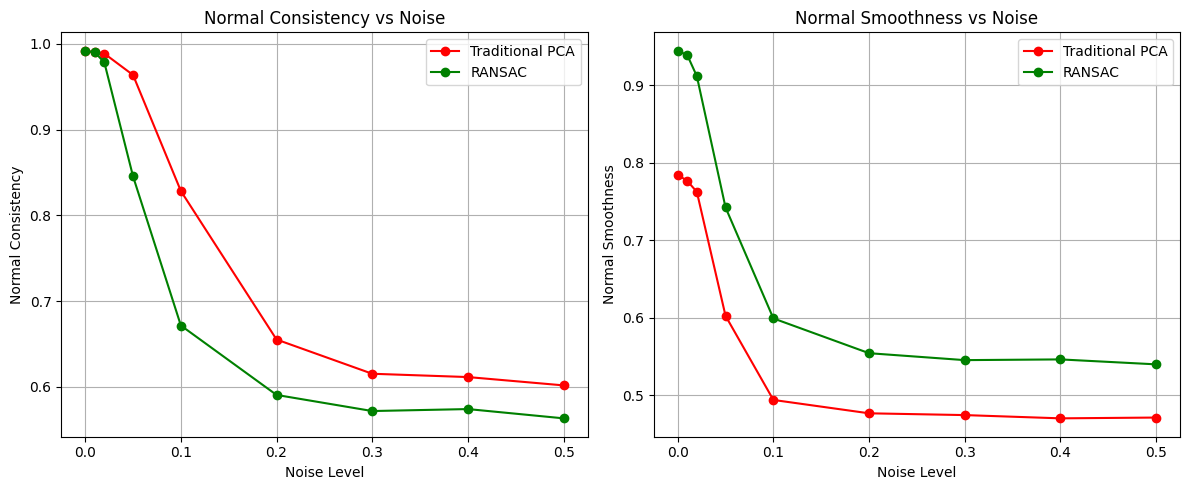

In [ ]:
import numpy as np
import open3d as o3d
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt

def evaluate_normal_estimation(points, normals, method_name="Method"):
    tree = KDTree(points)
    k_neighbors = 30
    consistency_scores = []
    smoothness_scores = []
    for i in range(len(points)):
        distances, indices = tree.query(points[i:i+1], k=k_neighbors)
        neighbor_normals = normals[indices[0]]
        current_normal = normals[i]
        dot_products = np.abs(np.dot(neighbor_normals, current_normal))
        consistency = np.mean(dot_products)
        consistency_scores.append(consistency)
        normal_variations = np.std(neighbor_normals, axis=0)
        smoothness = 1.0 - np.mean(normal_variations)
        smoothness_scores.append(smoothness)
    
    return {
        'consistency': np.mean(consistency_scores),
        'consistency_std': np.std(consistency_scores),
        'smoothness': np.mean(smoothness_scores),
        'smoothness_std': np.std(smoothness_scores)
    }

def compare_methods_with_noise(points, noise_levels=[0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]):
    results = {}
    
    for noise_level in noise_levels:
        noisy_points = points + np.random.normal(0, noise_level, points.shape)
        pcd_traditional = o3d.geometry.PointCloud()
        pcd_traditional.points = o3d.utility.Vector3dVector(noisy_points)
        pcd_traditional.estimate_normals(
            search_param=o3d.geometry.KDTreeSearchParamKNN(knn=50)
        )
        traditional_normals = np.asarray(pcd_traditional.normals)
        ransac_normals = ransac_normal_estimation_parallel(noisy_points)
        traditional_metrics = evaluate_normal_estimation(noisy_points, traditional_normals, "Traditional")
        ransac_metrics = evaluate_normal_estimation(noisy_points, ransac_normals, "RANSAC")
        results[noise_level] = {
            'Traditional': traditional_metrics,
            'RANSAC': ransac_metrics
        }
    return results

def plot_comparison_results(results):
    noise_levels = list(results.keys())
    traditional_consistency = [results[n]['Traditional']['consistency'] for n in noise_levels]
    ransac_consistency = [results[n]['RANSAC']['consistency'] for n in noise_levels]
    traditional_smoothness = [results[n]['Traditional']['smoothness'] for n in noise_levels]
    ransac_smoothness = [results[n]['RANSAC']['smoothness'] for n in noise_levels]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.plot(noise_levels, traditional_consistency, 'r-o', label='Traditional PCA')
    ax1.plot(noise_levels, ransac_consistency, 'g-o', label='RANSAC')
    ax1.set_xlabel('Noise Level')
    ax1.set_ylabel('Normal Consistency')
    ax1.set_title('Normal Consistency vs Noise')
    ax1.legend()
    ax1.grid(True)
    ax2.plot(noise_levels, traditional_smoothness, 'r-o', label='Traditional PCA')
    ax2.plot(noise_levels, ransac_smoothness, 'g-o', label='RANSAC')
    ax2.set_xlabel('Noise Level')
    ax2.set_ylabel('Normal Smoothness')
    ax2.set_title('Normal Smoothness vs Noise')
    ax2.legend()
    ax2.grid(True)
    plt.tight_layout()
    plt.savefig('e:/project/3DV/PAs/PA1/result/normal_estimation_comparison.png')
    plt.show()
pcd = o3d.io.read_point_cloud("e:/project/3DV/PAs/PA1/saddle.ply")
points = np.asarray(pcd.points)

results = compare_methods_with_noise(points)

for noise_level, metrics in results.items():
    print(f"\nNoise level: {noise_level}")
    print("PCA without RANSAC:")
    print(f"    Consistancy: {metrics['Traditional']['consistency']:.4f} ± {metrics['Traditional']['consistency_std']:.4f}")
    print(f"    Smoothness: {metrics['Traditional']['smoothness']:.4f} ± {metrics['Traditional']['smoothness_std']:.4f}")
    print("RANSAC:")
    print(f"  Consistancy: {metrics['RANSAC']['consistency']:.4f} ± {metrics['RANSAC']['consistency_std']:.4f}")
    print(f"  Smoothness: {metrics['RANSAC']['smoothness']:.4f} ± {metrics['RANSAC']['smoothness_std']:.4f}")

plot_comparison_results(results)

We define normal vector consistency as the calculation of the average cosine of the angle between each point and its nearest neighbor's normal vectors, and normal vector smoothing as the calculation of the standard deviation of the local normal vector variation.
It can be seen that the agreements of both methods are higher in the case of no noise, but the agreement of RANSAC decreases more obviously with the growth of noise, and I think the reason may be because PCA is a global optimization method, which takes into account the contribution of all the nearest-neighbors points, while RANSAC is a sampling-based method, which uses only some points to estimate the normal vector each time, which may result in local discontinuities. However, on the smoothness curve, the results are in line with our expectations, i.e., RANSAC has better smoothness compared to PCA.


Noise level: 0
Traditional PCA:
    Mean Error: 10.72° ± 9.32°
    Median Error: 6.38°
    Max Error: 40.00°
RANSAC:
    Mean Error: 11.78° ± 9.67°
    Median Error: 8.85°
    Max Error: 60.94°

Noise level: 0.01
Traditional PCA:
    Mean Error: 10.84° ± 9.21°
    Median Error: 6.50°
    Max Error: 39.90°
RANSAC:
    Mean Error: 12.64° ± 10.31°
    Median Error: 9.61°
    Max Error: 58.95°

Noise level: 0.02
Traditional PCA:
    Mean Error: 11.14° ± 9.20°
    Median Error: 6.81°
    Max Error: 40.52°
RANSAC:
    Mean Error: 13.90° ± 10.64°
    Median Error: 11.36°
    Max Error: 65.45°

Noise level: 0.05
Traditional PCA:
    Mean Error: 12.33° ± 9.40°
    Median Error: 8.66°
    Max Error: 44.89°
RANSAC:
    Mean Error: 17.32° ± 13.01°
    Median Error: 13.95°
    Max Error: 84.80°

Noise level: 0.1
Traditional PCA:
    Mean Error: 17.53° ± 12.68°
    Median Error: 14.05°
    Max Error: 72.45°
RANSAC:
    Mean Error: 25.96° ± 18.40°
    Median Error: 21.61°
    Max Error: 89.59°

Nois

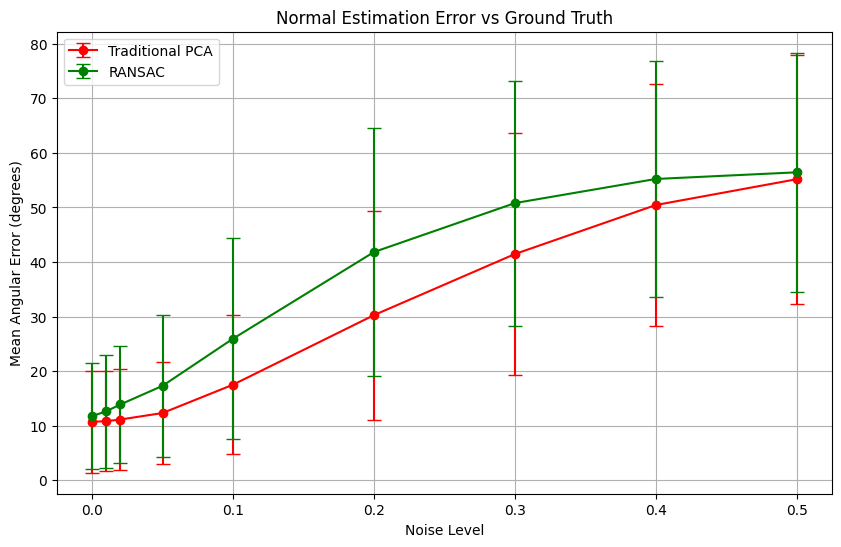

In [ ]:
import trimesh
import numpy as np
import open3d as o3d
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt

def evaluate_normal_accuracy(estimated_normals, ground_truth_normals):
    dot_products = np.abs(np.sum(estimated_normals * ground_truth_normals, axis=1))
    dot_products = np.clip(dot_products, -1.0, 1.0)
    angles = np.arccos(dot_products)
    angles_deg = np.degrees(angles)
    
    return {
        'mean_error': np.mean(angles_deg),
        'std_error': np.std(angles_deg),
        'median_error': np.median(angles_deg),
        'max_error': np.max(angles_deg)
    }

def compare_with_ground_truth(noise_levels=[0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]):
    mesh = trimesh.load("e:/project/3DV/PAs/PA1/saddle.obj")
    gt_points = np.array(mesh.vertices)
    gt_normals = np.array(mesh.vertex_normals)
    
    results = {}
    for noise_level in noise_levels:
        noisy_points = gt_points + np.random.normal(0, noise_level, gt_points.shape)
        
        pcd_traditional = o3d.geometry.PointCloud()
        pcd_traditional.points = o3d.utility.Vector3dVector(noisy_points)
        pcd_traditional.estimate_normals(
            search_param=o3d.geometry.KDTreeSearchParamKNN(knn=50)
        )
        traditional_normals = np.asarray(pcd_traditional.normals)
        ransac_normals = ransac_normal_estimation_parallel(noisy_points)
        traditional_metrics = evaluate_normal_accuracy(traditional_normals, gt_normals)
        ransac_metrics = evaluate_normal_accuracy(ransac_normals, gt_normals)
        results[noise_level] = {
            'Traditional': traditional_metrics,
            'RANSAC': ransac_metrics
        }
    
    return results

def plot_ground_truth_comparison(results):
    noise_levels = list(results.keys())
    traditional_errors = [results[n]['Traditional']['mean_error'] for n in noise_levels]
    ransac_errors = [results[n]['RANSAC']['mean_error'] for n in noise_levels]
    
    traditional_stds = [results[n]['Traditional']['std_error'] for n in noise_levels]
    ransac_stds = [results[n]['RANSAC']['std_error'] for n in noise_levels]
    
    plt.figure(figsize=(10, 6))
    plt.errorbar(noise_levels, traditional_errors, yerr=traditional_stds, 
                fmt='r-o', label='Traditional PCA', capsize=5)
    plt.errorbar(noise_levels, ransac_errors, yerr=ransac_stds, 
                fmt='g-o', label='RANSAC', capsize=5)
    
    plt.xlabel('Noise Level')
    plt.ylabel('Mean Angular Error (degrees)')
    plt.title('Normal Estimation Error vs Ground Truth')
    plt.legend()
    plt.grid(True)
    
    plt.savefig('e:/project/3DV/PAs/PA1/result/normal_estimation_gt_comparison.png')
    plt.show()

results = compare_with_ground_truth()

for noise_level, metrics in results.items():
    print(f"\nNoise level: {noise_level}")
    print("Traditional PCA:")
    print(f"    Mean Error: {metrics['Traditional']['mean_error']:.2f}° ± {metrics['Traditional']['std_error']:.2f}°")
    print(f"    Median Error: {metrics['Traditional']['median_error']:.2f}°")
    print(f"    Max Error: {metrics['Traditional']['max_error']:.2f}°")
    print("RANSAC:")
    print(f"    Mean Error: {metrics['RANSAC']['mean_error']:.2f}° ± {metrics['RANSAC']['std_error']:.2f}°")
    print(f"    Median Error: {metrics['RANSAC']['median_error']:.2f}°")
    print(f"    Max Error: {metrics['RANSAC']['max_error']:.2f}°")

plot_ground_truth_comparison(results)

We use the vertex normal vectors of the mesh as the ground truth, compute the angular error between the estimated normal vectors and the ground truth, and plot the error rate as the noise increases. It is found that none of the RANSAC ever outperforms the PCA method, and in fact I still have a lot of questions about this result.

### Subproblem 2.4
Use Rusinkiewicz’s method to compute the principal curvatures for each face in icosphere.obj and sievert.obj.
- Step 1: Load pi, ni, and the face normal n
- Step 2: Select two orthogonal vectors ξu and ξv on the tangent plane of the face
- Step 3: Define Df = [ξu, ξv], design the optimization problem by Equation 1 and compute S by 
least-square
- Step 4: Compute the eigenvalues of S as the principal curvatures
$$
\begin{cases}
S D_f^T (p_2 - p_1) = D_f^T (\vec{n}_2 - \vec{n}_1) \\

S D_f^T (p_0 - p_2) = D_f^T (\vec{n}_0 - \vec{n}_2) \\

S D_f^T (p_1 - p_0) = D_f^T (\vec{n}_1 - \vec{n}_0)

\end{cases}
$$
### Solution
By examining the structure of the OBJ file: the sievert.obj file contains v and f, allowing us to apply the algorithm described above to compute the principal curvatures. However, the icosphere.obj file contains v, vt, vn, and f, meaning that the file provides both the tangents and normals for each face. To avoid using the pre-existing normal information, we will process the icosphere.obj file by removing the normal data and retaining only the vertex information.

In [ ]:
import open3d as o3d
import numpy as np

mesh = o3d.io.read_triangle_mesh("icosphere.obj")

new_mesh = o3d.geometry.TriangleMesh()
new_mesh.vertices = mesh.vertices
new_mesh.triangles = mesh.triangles

new_mesh.vertex_normals = o3d.utility.Vector3dVector([])
new_mesh.triangle_normals = o3d.utility.Vector3dVector([])

o3d.io.write_triangle_mesh("icosphere_no_normal.obj", new_mesh, write_vertex_normals=False)

True

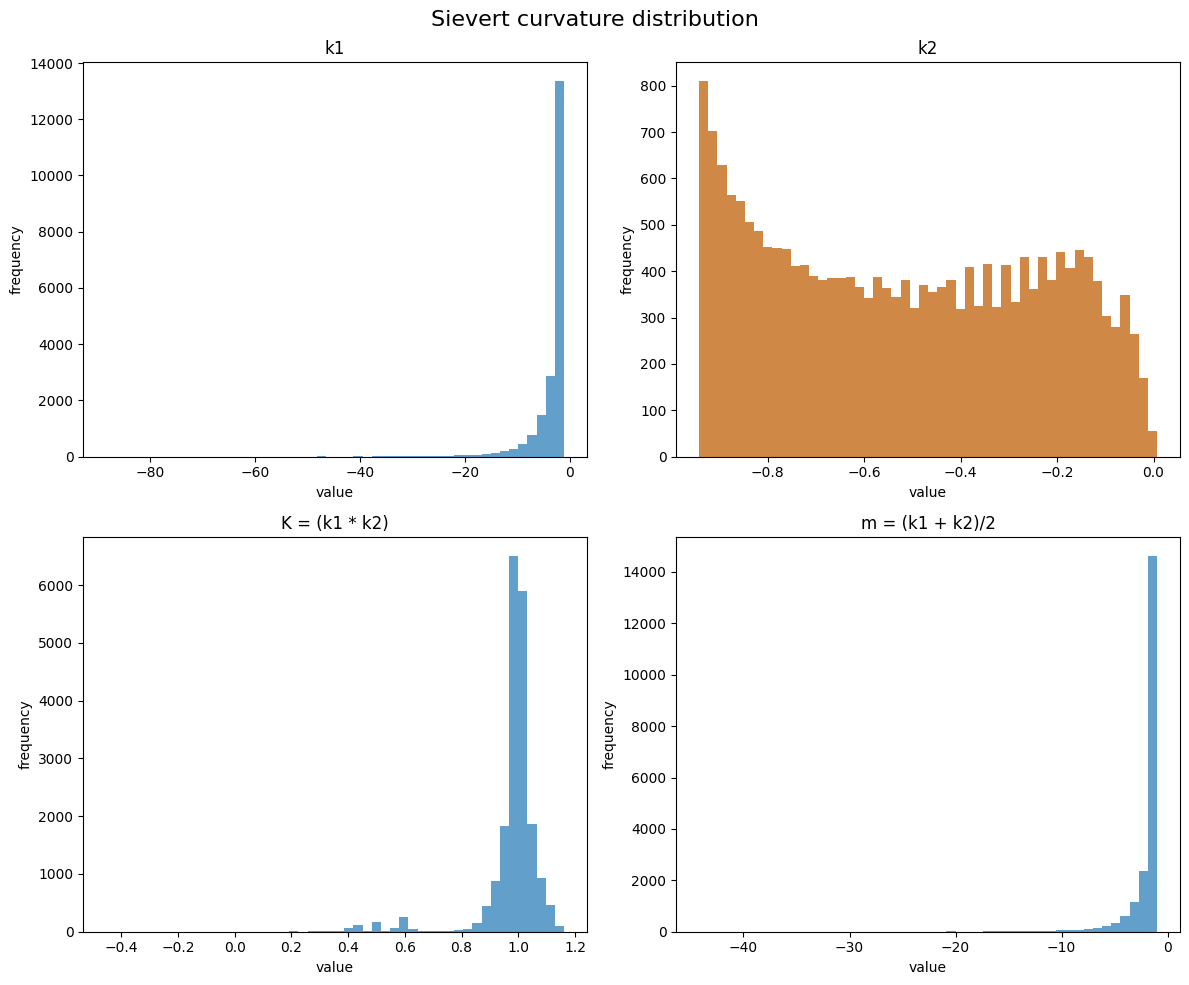

Sievert curvature distribution stats:
average k1= -3.3922, sigma = 4.5506
average k2= -0.5206, sigma = 0.2777
average Gauss Curvature= 0.9783, sigma = 0.1110
average mean Curvature= -1.9564, sigma = 2.1914


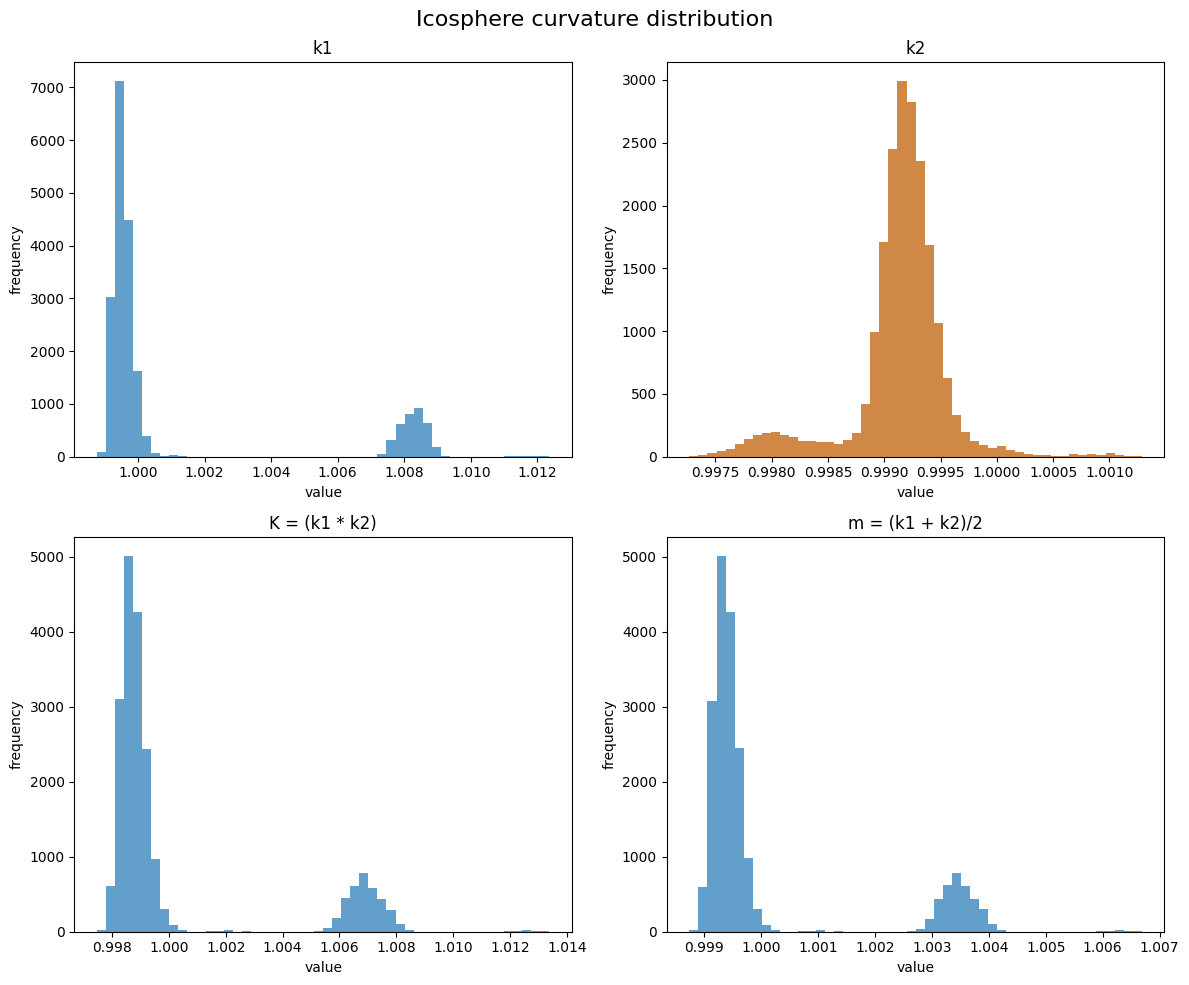

Icosphere curvature distribution stats:
average k1= 1.0011, sigma = 0.0034
average k2= 0.9991, sigma = 0.0004
average Gauss Curvature= 1.0002, sigma = 0.0032
average mean Curvature= 1.0001, sigma = 0.0016


In [ ]:
import numpy as np
import trimesh
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import os
def compute_principal_curvatures(mesh):
    
    vertices = mesh.vertices
    faces = mesh.faces
    vertex_normals = mesh.vertex_normals
    face_normals = mesh.face_normals
    face_curvatures = np.zeros((len(faces), 2))
    for i, face in enumerate(faces):
        p0, p1, p2 = vertices[face]
        n0, n1, n2 = vertex_normals[face]
        face_normal = face_normals[i]
        e0 = p1 - p0
        e1 = p2 - p1
        e2 = p0 - p2
        dn0 = n1 - n0
        dn1 = n2 - n1
        dn2 = n0 - n2
        xi_u = np.zeros(3)
        if abs(face_normal[0]) > abs(face_normal[1]):
            xi_u[1] = 1.0
        else:
            xi_u[0] = 1.0
        xi_u = xi_u - np.dot(xi_u, face_normal) * face_normal
        xi_u = xi_u / np.linalg.norm(xi_u)
        xi_v = np.cross(face_normal, xi_u)
        xi_v = xi_v / np.linalg.norm(xi_v)
        Df = np.column_stack((xi_u, xi_v))
        A = np.zeros((6, 4))
        b = np.zeros(6)
        edges = [(e0, dn0), (e1, dn1), (e2, dn2)]
        row = 0
        for edge, dn in edges:
            w = np.dot(Df.T, edge)
            A[row, 0] = w[0]
            A[row, 1] = w[1]
            A[row+1, 2] = w[0]
            A[row+1, 3] = w[1]
            b[row] = np.dot(xi_u, dn)
            b[row+1] = np.dot(xi_v, dn)
            row += 2
        x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
        S = np.array([[x[0], x[2]], [x[1], x[3]]])
        S = (S + S.T) / 2
        eigenvalues, _ = eigh(S)
        k1, k2 = eigenvalues
        if abs(k1) < abs(k2):
            k1, k2 = k2, k1
        face_curvatures[i] = [k1, k2]
    
    return face_curvatures

def plot_curvature_histogram(curvatures, title, filename=None):
    k1 = curvatures[:, 0]
    k2 = curvatures[:, 1]
    gaussian = k1 * k2
    mean = (k1 + k2) / 2
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0, 0].hist(k1, bins=50, alpha=0.7)
    axs[0, 0].set_title('k1')
    axs[0, 0].set_xlabel('value')
    axs[0, 0].set_ylabel('frequency')

    axs[0, 1].hist(k2, bins=50, alpha=0.7)
    axs[0, 1].hist(k2, bins=50, alpha=0.7)
    axs[0, 1].set_title('k2')
    axs[0, 1].set_xlabel('value')
    axs[0, 1].set_ylabel('frequency')

    
    axs[1, 0].hist(gaussian, bins=50, alpha=0.7)
    axs[1, 0].set_title('K = (k1 * k2)')
    axs[1, 0].set_xlabel('value')
    axs[1, 0].set_ylabel('frequency')
    
    axs[1, 1].hist(mean, bins=50, alpha=0.7)
    axs[1, 1].set_title('m = (k1 + k2)/2')
    axs[1, 1].set_xlabel('value')
    axs[1, 1].set_ylabel('frequency')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    
    if filename:
        plt.savefig(filename)
    
    plt.show()
    
    print(f"{title} stats:")
    print(f"average k1= {np.mean(k1):.4f}, sigma = {np.std(k1):.4f}")
    print(f"average k2= {np.mean(k2):.4f}, sigma = {np.std(k2):.4f}")
    print(f"average Gauss Curvature= {np.mean(gaussian):.4f}, sigma = {np.std(gaussian):.4f}")
    print(f"average mean Curvature= {np.mean(mean):.4f}, sigma = {np.std(mean):.4f}")

def main():
    sievert_path = "sievert.obj"
    icosphere_path = "icosphere_no_normal.obj"
    sievert = trimesh.load_mesh(sievert_path)
    icosphere = trimesh.load_mesh(icosphere_path)
    icosphere_curvatures = compute_principal_curvatures(icosphere)
    sievert_curvatures = compute_principal_curvatures(sievert)
    plot_curvature_histogram(sievert_curvatures, "Sievert curvature distribution", "sievert_curvatures.png")
    plot_curvature_histogram(icosphere_curvatures, "Icosphere curvature distribution", "icosphere_curvatures.png")
    gaussian_curvature = sievert_curvatures[:, 0] * sievert_curvatures[:, 1]
    mean_gaussian = np.mean(gaussian_curvature)
    std_gaussian = np.std(gaussian_curvature)
if __name__ == "__main__":
    main()

## Problem 3
Let $ p := (1+j)/\sqrt{2} $ and $ q := (1+k)/\sqrt{2} $ denote the unit-norm quaternions. Recall that the rotation $ M(p) $ is a 90-degree rotation about the $Y$ axis, while $ M(q) $ is a 90-degree rotation about the $Z$ axis. In the notes, we composed the two rotations $ M(p) $ and $ M(q) $. Here, we instead investigate the rotation that lies halfway between $ M(p) $ and $ M(q) $. The quaternion that lies halfway between $ p $ and $ q $ is simply
$$
\frac{p+q}{2} = \frac{1}{\sqrt{2}} + \frac{j}{2\sqrt{2}} + \frac{k}{2\sqrt{2}}
$$
### Subproblem 3.1
 Calculate the norm $ |(p+q)/2| $ of that quaternion, and note that it is not 1. Find a quaternion $ r $ that is a scalar multiple of $ (p+q)/2 $ and that has unit norm, $ |r| = 1 $, and calculate the rotation matrix $ M(r) $. Around what axis does $ M(r) $ rotate, and through what angle (say, to the nearest tenth of a degree)? 
### Solution
For a quaternion $q$,
$$
|q| = \sqrt{a^2 + b^2 + c^2 + d^2}
$$
Thus for $\frac{p+q}{2}$,
$$
|(p+q)/2| = \sqrt{1/2 + 1/8 + 1/8 } = \dfrac{\sqrt{3}}{2}\\
r = \dfrac{\sqrt{6}}{3} + \dfrac{\sqrt{6}j}{6} + \dfrac{\sqrt{6}k}{6}\\
$$
From the relationship the quaternion $R = w + x\vec{i} + y\vec{j} + z\vec{k}$, where  $w^2 + x^2 + y^2 + z^2 = 1$
$$
M(R) = 
\begin{bmatrix}
1 - 2y^2 - 2z^2 & 2xy - 2wz & 2xz + 2wy \\
2xy + 2wz & 1 - 2x^2 - 2z^2 & 2yz - 2wx \\ 
2xz - 2wy & 2yz + 2wx & 1 - 2x^2 - 2y^2
\end{bmatrix}
$$
Thus we get
$$
M(r) = 
\begin{bmatrix}
\dfrac{1}{3} & -\dfrac{2}{3} & \dfrac{2}{3} \\
\dfrac{2}{3} & \dfrac{2}{3} & \dfrac{1}{3} \\
-\dfrac{2}{3} & \dfrac{1}{3} & \dfrac{2}{3}
\end{bmatrix}
$$
And from the relationship of $M(R)$ and anxis-angle representation,
$$
\text{tr}(M) = 1 + 2\cos\theta\\
\theta  = \arccos(\dfrac{1}{2}(\text{tr}(M) - 1)) \\
$$
Thus 
$$
\theta = \arccos(\dfrac{1}{2}(\frac{5}{3} - 1)) = 70.5^\circ
$$
Axis:
$$
[0, \dfrac{\sqrt{2}}{2}, \dfrac{\sqrt{2}}{2}]
$$
### Subproblem 3.2
### Solution
By the relationship of quaternion and axis angle representation,
$$
q = \cos(\theta/) + sin(\theta/2)\vec{v}\\
p: [0, \dfrac{\pi}{2}, 0]\\
q: [0, 0, \dfrac{\pi}{2}]
$$
### Subproblem 3.3
Skew-symmetric representation of rotation: In this problem, we use $[\omega]$ to represent a skew-symmetric matrix constructed from $\omega \in \mathbb{R}^3$ as instructed in class
### Solution
#### (a)
>Build the skew-symmetric matrix $[\omega_p]$ of $p$ and $[\omega_q]$ of $q$, and derive their rotation matrices.

By vector $\omega = [\omega_1, \omega_2, \omega_3]$'s skew-symmetric matrix $\hat {\omega}$:
$$
[\omega] = \hat \omega =
\begin{bmatrix}
0 & -\omega_3 & \omega_2 \\
\omega_3 & 0 & -\omega_1 \\
-\omega_2 & \omega_1 & 0
\end{bmatrix}
$$
Thus we get
$$
[\omega_p] =
\begin{bmatrix}
0 & 0 & \frac{\pi}{2} \\
0 & 0 & 0 \\
-\frac{\pi}{2} & 0 & 0
\end{bmatrix}
$$
$$
[\omega_q] =
\begin{bmatrix}
0 & -\frac{\pi}{2} & 0 \\
\frac{\pi}{2} & 0 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$
From Rodrigues' Lemma, we know that 
$$
\exp([\omega]) = I + \sin(\theta)\hat{n} + (1 - \cos(\theta)){\hat{n}}^2
$$
where $\hat w = \theta \hat n$,
Thus we get
$$
exp([\omega_p]) = M(p) = 
\begin{bmatrix}
0 & 0 & 1\\
0 & 1 & 0\\
-1 & 0 & 0
\end{bmatrix}
$$
$$
exp([\omega_q]) = M(q) =
\begin{bmatrix}
0 & -1 & 0\\
1 & 0 & 0\\
0 & 0 & 1
\end{bmatrix}
$$
#### (b) 
>Using what you have above to verify that the following $\exp([\omega_1] + [\omega_2]) = \exp([\omega_1]) \exp([\omega_2])$ relationship does not hold for exponential map in general(Note: The condition for this equation to hold is $[\omega_1][\omega_2] = [\omega_2][\omega_1]$). Therefore, composing rotations in skew-symmetric representation should not be done in this way.
$$
[\omega_p] + [\omega_q] =
\begin{bmatrix}
0 & -\frac{\pi}{2} & \frac{\pi}{2} \\
\frac{\pi}{2} & 0 & 0 \\
-\frac{\pi}{2} & 0 & 0
\end{bmatrix}
$$
From 
$$
[\omega] = 
\begin{bmatrix}
0 & -\omega_3 & \omega_2 \\
\omega_3 & 0 & -\omega_1 \\
-\omega_2 & \omega_1 & 0
\end{bmatrix}
$$
we know that
$$
\omega_1 = 0,\omega_2 = \frac{\pi}{2},\omega_3 = \frac{\pi}{2}\\
\omega = [0, \frac{\pi}{2}, \frac{\pi}{2}] = \frac{\sqrt{2}\pi}{2} [0, \frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}]\\
\vec{n} = \frac{\omega}{\theta} = [0, \frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}]\\
\theta = \frac{\sqrt{2}\pi}{2}\\
\hat{n} = [n] = 
\begin{bmatrix}
0 & -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\
\frac{\sqrt{2}}{2} & 0 & 0\\
-\frac{\sqrt{2}}{2} & 0 & 0
\end{bmatrix}
$$
Thus from Rodrigues' Lemma, we get
$$
exp([\omega]) = I + \sin(\theta)\hat{n} + (1 - \cos(\theta)){\hat{n}}^2\\
exp([\omega_p]+ [\omega_q])
= I + \sin(\frac{\sqrt{2}\pi}{2})\hat{n} + (1 - \cos(\frac{\sqrt{2}\pi}{2})){\hat{n}}^2\\
= 
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}
+
sin(\frac{\sqrt{2}\pi}{2})
\begin{bmatrix}
0 & -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\
\frac{\sqrt{2}}{2} & 0 & 0\\
-\frac{\sqrt{2}}{2} & 0 & 0
\end{bmatrix}
+
(1 - \cos(\frac{\sqrt{2}\pi}{2}))
\begin{bmatrix}
-1 & 0 & 0\\
0 & -\frac{1}{2} & \frac{1}{2}\\
0 & \frac{1}{2} & -\frac{1}{2}
\end{bmatrix}\\
$$
$$
\exp([\omega_p] + [\omega_q]) = \begin{bmatrix}
\cos\left(\frac{\pi}{\sqrt{2}}\right) & -\frac{\sin\left(\frac{\pi}{\sqrt{2}}\right)}{\sqrt{2}} & \frac{\sin\left(\frac{\pi}{\sqrt{2}}\right)}{\sqrt{2}} \\
\frac{\sin\left(\frac{\pi}{\sqrt{2}}\right)}{\sqrt{2}} & \frac{1+\cos\left(\frac{\pi}{\sqrt{2}}\right)}{2} & \frac{1-\cos\left(\frac{\pi}{\sqrt{2}}\right)}{2} \\
-\frac{\sin\left(\frac{\pi}{\sqrt{2}}\right)}{\sqrt{2}} & \frac{1-\cos\left(\frac{\pi}{\sqrt{2}}\right)}{2} & \frac{1+\cos\left(\frac{\pi}{\sqrt{2}}\right)}{2}
\end{bmatrix}=

\begin{bmatrix}
-0.60569987 & -0.56264006 & 0.56264006\\
0.56264006 & 0.19715007 & 0.80284993\\
-0.56264006 & 0.80284993 & 0.19715007
\end{bmatrix}
$$
However,
$$
exp([\omega_p])exp([\omega_q]) =
\begin{bmatrix}
0 & -1 & 0\\
1 & 0 & 0\\
0 & 1 & 0
\end{bmatrix}
$$
Therefore, we verified that composing rotations in skew-symmetric representation should not be done in this way.

### Subproblem 3.4
**Double-covering of quaternion:** What are the exponential coordinates of $p' = -p$ and $q' = -q$? What do you observe by comparing the exponential coordinates of $(p, -p)$ and $(q, -q)$? Does this relation hold for any quaternion pair $(r, -r)$? If it does, write down the statement and prove it.
### Solution
For $p'$ and $q'$,
$$
p' = [0, -\frac{\pi}{2}, 0]\\
q' = [0, 0, -\frac{\pi}{2}]\\
$$
Actually the exponential coordinates of $(p, -p)$ represents the same rotation, the same as the exponential coordinates of $(q, -q)$ and any  quaternion pair $(r, -r)$.
##### Proof of any  quaternion pair $(r, -r)$ represents the same rotation
Assume $r = (w, x, y, z) = \cos\frac{\theta}{2} + \mathbf{u}\sin\frac{\theta}{2} $
$$
-r = -\cos\frac{\theta}{2} - \mathbf{u}\sin\frac{\theta}{2} = \cos(\pi - \frac{\theta}{2}) + (-\mathbf{u})\sin(\pi - \frac{\theta}{2}) = \cos(\frac{2\pi - \theta}{2}) + (-\mathbf{u})\sin(\frac{2\pi - \theta}{2})
$$
That represents rotaing around $- \mathbf{u}$ is $2 \pi - \theta $, it is the same as rotating around u for angle $\theta$.




## Problem 4
Given a mesh such as a Stanford Bunny, use spheres to approximate the given mesh. The objective is maximizing the volume covered while ensuring the total number of spheres does not exceed a predefined number N . Please locate the meshes to be used for this assignment in the folder objs approx. You are free to choose the sphere radius and the maximum number of spheres N ; however, you should provide clear and well-reasoned justifications for the values you choose. For each mesh, we expect you to create multiple problem settings with different N and sphere radius. Subsequently, solve theproblem under these different configurations and perform a thorough analysis of both efficiency and quality.

### Subproblem 4.1
Mesh Volume Estimation. Estimate the volume of a 3D mesh (e.g., Stanford Bunny)
>Hint: Use Python packages such as trimesh and PyVista for SDF computing and sampling. In addition to simply implementing these methods, conduct some comparisons between these two methods and compare computational trade-offs.
### Solution
#### (a) Using Voxelization
Estimate the volume by converting the mesh into a voxel. Please vary the resolution and perform comparisons and analysis regarding the efficiency and the accuracy.



True Volume: 0.0008529406012024281

Volume estimation results under different resolutions:
Resolution | Volume | Error(%) | Time(s) | Memory(MB)
---------------------------------------------


Processing Bunny:   0%|          | 0/6 [00:00<?, ?it/s]

Processing Bunny:  17%|█▋        | 1/6 [00:47<03:58, 47.69s/it]

    8      | 0.00205002 |  140.35  |  0.678  |   29.84   


Processing Bunny:  33%|███▎      | 2/6 [01:43<03:30, 52.74s/it]

    16     | 0.00137053 |  60.68   |  0.561  |   28.64   


Processing Bunny:  50%|█████     | 3/6 [02:39<02:42, 54.16s/it]

    32     | 0.00108001 |  26.62   |  0.653  |  -163.30  


Processing Bunny:  67%|██████▋   | 4/6 [03:35<01:49, 54.60s/it]

    64     | 0.00095955 |  12.50   |  1.009  |   33.54   


Processing Bunny:  83%|████████▎ | 5/6 [04:35<00:56, 56.53s/it]

   128     | 0.00090557 |   6.17   |  3.597  |   97.20   


Processing Bunny: 100%|██████████| 6/6 [05:51<00:00, 58.52s/it]


   256     | 0.00087886 |   3.04   | 19.925  |   411.14  


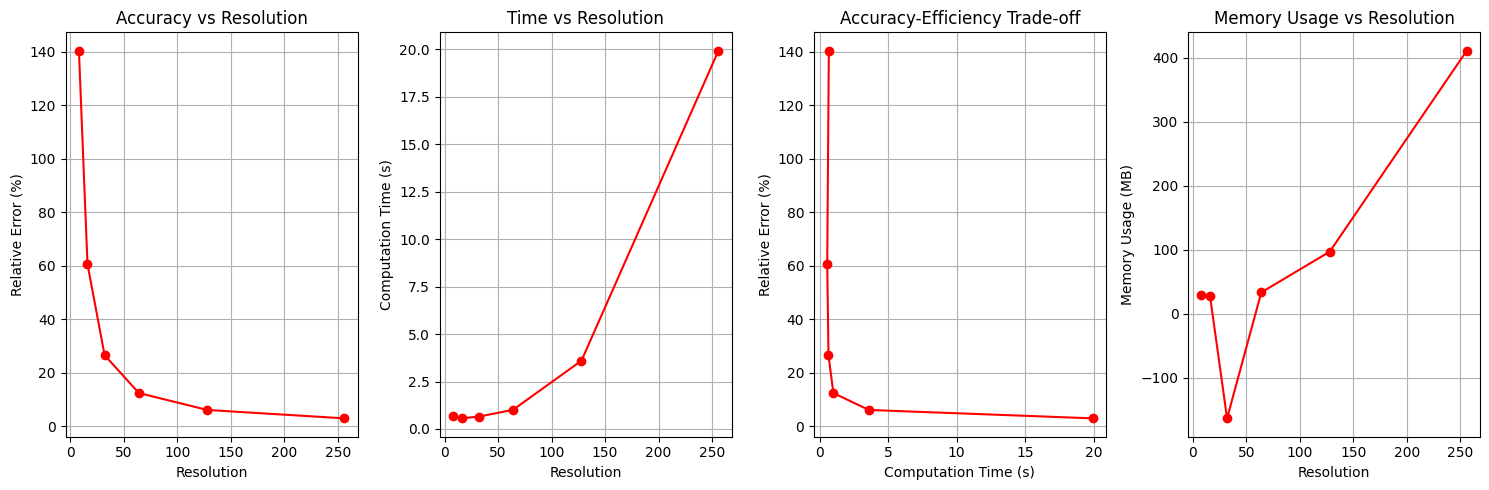


Best resolution: 256, Relative error: 3.04%


In [7]:
import open3d as o3d
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import trimesh

def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 / 1024 


def estimate_volume_voxel(mesh_path, resolution):
    initial_memory = get_memory_usage()
    mesh = o3d.io.read_triangle_mesh(mesh_path)
    mesh.compute_vertex_normals()
    is_watertight = mesh.is_watertight()
    if not is_watertight:
        print("Warning: Mesh is not watertight, which may affect volume calculation accuracy")
    start_time = time.time()
    bbox = mesh.get_axis_aligned_bounding_box()
    bbox_size = bbox.get_max_bound() - bbox.get_min_bound()
    voxel_size = max(bbox_size) / resolution
    volume = bbox.volume()
    tri_mesh = trimesh.load(mesh_path)
    tri_mesh.fill_holes()
    tri_mesh.fix_normals()
    voxels = tri_mesh.voxelized(pitch=voxel_size).fill()
    points = voxels.points
    voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(
        o3d.geometry.PointCloud(points=o3d.utility.Vector3dVector(points)),
        voxel_size=voxel_size
    )
    volume = voxels.volume
    time_cost = time.time() - start_time
    memory_used = get_memory_usage() - initial_memory
    
    return volume, time_cost, voxel_grid, memory_used

def compute_true_volume(mesh_path):
    trimesh_mesh = trimesh.load(mesh_path)
    trimesh_mesh.fill_holes()
    trimesh_mesh.fix_normals()
    true_volume = trimesh_mesh.volume
    o3d_mesh = o3d.io.read_triangle_mesh(mesh_path)
    o3d_mesh.compute_vertex_normals()
    return true_volume, o3d_mesh

def main():
    bunny_path = "e:/project/3DV/PAs/PA1/objs_approx/bunny.obj"
    resolutions = [8, 16, 32, 64, 128, 256]
    true_volume, original_mesh = compute_true_volume(bunny_path)
    print(f"True Volume: {true_volume}")
    volumes = []
    times = []
    voxel_grids = []
    relative_errors = []
    memory_usages = []
    print("\nVolume estimation results under different resolutions:")
    print("Resolution | Volume | Error(%) | Time(s) | Memory(MB)")
    print("-" * 45)
    
    for res in tqdm(resolutions, desc="Processing Bunny"):
        vol, t, voxel_grid, mem = estimate_volume_voxel(bunny_path, res)
        volumes.append(vol)
        times.append(t)
        voxel_grids.append(voxel_grid)
        memory_usages.append(mem)
        rel_error = abs(vol - true_volume) / true_volume * 100
        relative_errors.append(rel_error)
        print(f"{res:^10d} | {vol:^10.8f} | {rel_error:^8.2f} | {t:^7.3f} | {mem:^10.2f}")
    
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    axes[0].plot(resolutions, relative_errors, 'ro-')
    axes[0].set_xlabel('Resolution')
    axes[0].set_ylabel('Relative Error (%)')
    axes[0].set_title('Accuracy vs Resolution')
    axes[0].grid(True)
    
    axes[1].plot(resolutions, times, 'ro-')
    axes[1].set_xlabel('Resolution')
    axes[1].set_ylabel('Computation Time (s)')
    axes[1].set_title('Time vs Resolution')
    axes[1].grid(True)
    
    axes[2].plot(times, relative_errors, 'ro-')
    axes[2].set_xlabel('Computation Time (s)')
    axes[2].set_ylabel('Relative Error (%)')
    axes[2].set_title('Accuracy-Efficiency Trade-off')
    axes[2].grid(True)
    
    axes[3].plot(resolutions,memory_usages , 'ro-')
    axes[3].set_xlabel('Resolution')
    axes[3].set_ylabel('Memory Usage (MB)')
    axes[3].set_title('Memory Usage vs Resolution')
    axes[3].grid(True)
    
    
    
    plt.tight_layout()
    plt.savefig("e:/project/3DV/PAs/PA1/volume_analysis.png")
    plt.show()
    best_res_idx = np.argmin(relative_errors)
    best_res = resolutions[best_res_idx]
    best_voxel_grid = voxel_grids[best_res_idx]
    
    print(f"\nBest resolution: {best_res}, Relative error: {relative_errors[best_res_idx]:.2f}%")
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name="Voxelization Result")
    original_mesh.paint_uniform_color([0.8, 0.8, 0.8])
    original_mesh.compute_vertex_normals()
    vis.add_geometry(original_mesh)
    vis.add_geometry(best_voxel_grid)
    opt = vis.get_render_option()
    opt.background_color = np.array([0.1, 0.1, 0.1])
    opt.mesh_show_wireframe = True
    opt.mesh_show_back_face = True
    vis.run()
    vis.destroy_window()

if __name__ == "__main__":
    main()

True Volume: 0.0008529406012024281

Volume estimation results under different resolutions:
Resolution | Volume | Error(%) | Time(s) | Memory(MB)
---------------------------------------------


Processing Bunny:   0%|          | 0/6 [00:00<?, ?it/s]

Processing Bunny:  17%|█▋        | 1/6 [00:36<03:04, 36.94s/it]

    8      | 0.00205002 |  140.35  |  0.470  |   30.18   


Processing Bunny:  33%|███▎      | 2/6 [01:10<02:20, 35.14s/it]

    16     | 0.00137053 |  60.68   |  0.422  |   29.68   


Processing Bunny:  50%|█████     | 3/6 [01:45<01:44, 34.78s/it]

    32     | 0.00108001 |  26.62   |  0.379  |   28.36   


Processing Bunny:  67%|██████▋   | 4/6 [02:19<01:08, 34.45s/it]

    64     | 0.00095955 |  12.50   |  0.763  |   34.86   


Processing Bunny:  83%|████████▎ | 5/6 [02:54<00:34, 34.84s/it]

   128     | 0.00090557 |   6.17   |  2.606  |   64.29   


Processing Bunny: 100%|██████████| 6/6 [03:41<00:00, 36.92s/it]

   256     | 0.00087886 |   3.04   | 13.221  |   551.75  


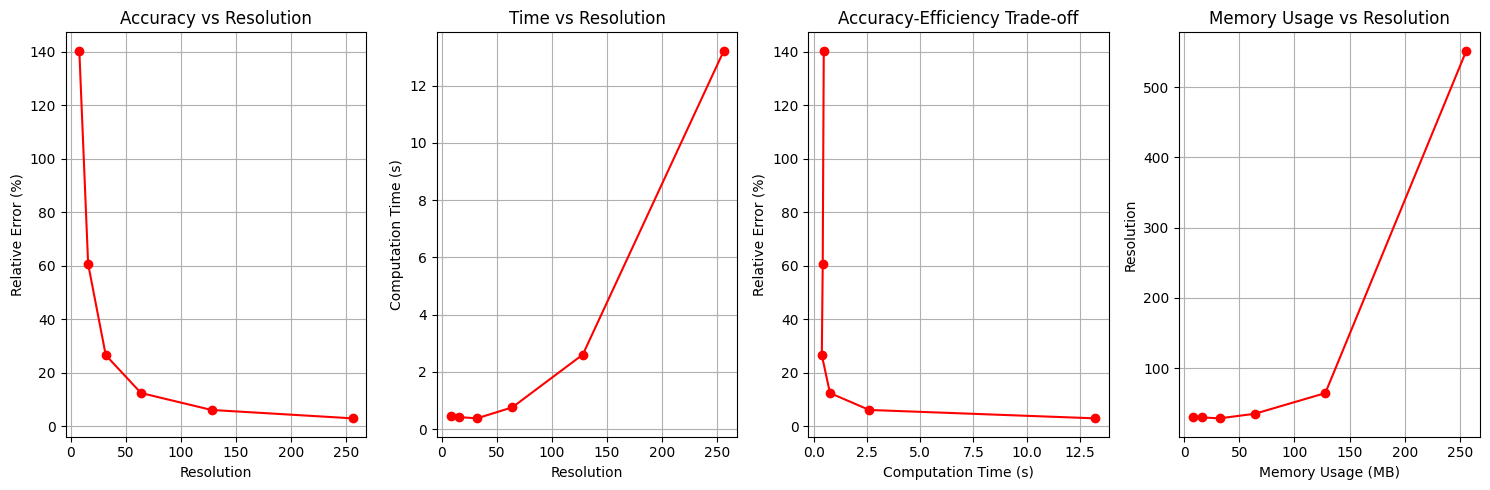


Best resolution: 256, Relative error: 3.04%


In [ ]:
import open3d as o3d
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import trimesh

def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 / 1024 


def estimate_volume_voxel(mesh_path, resolution):
    initial_memory = get_memory_usage()
    mesh = o3d.io.read_triangle_mesh(mesh_path)
    mesh.compute_vertex_normals()
    is_watertight = mesh.is_watertight()
    if not is_watertight:
        print("Warning: Mesh is not watertight, which may affect volume calculation accuracy")
    start_time = time.time()
    bbox = mesh.get_axis_aligned_bounding_box()
    bbox_size = bbox.get_max_bound() - bbox.get_min_bound()
    voxel_size = max(bbox_size) / resolution
    volume = bbox.volume()
    tri_mesh = trimesh.load(mesh_path)
    tri_mesh.fill_holes()
    tri_mesh.fix_normals()
    voxels = tri_mesh.voxelized(pitch=voxel_size).fill()
    points = voxels.points
    voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(
        o3d.geometry.PointCloud(points=o3d.utility.Vector3dVector(points)),
        voxel_size=voxel_size
    )
    volume = voxels.volume
    time_cost = time.time() - start_time
    memory_used = get_memory_usage() - initial_memory
    
    return volume, time_cost, voxel_grid, memory_used

def compute_true_volume(mesh_path):
    trimesh_mesh = trimesh.load(mesh_path)
    trimesh_mesh.fill_holes()
    trimesh_mesh.fix_normals()
    true_volume = trimesh_mesh.volume
    o3d_mesh = o3d.io.read_triangle_mesh(mesh_path)
    o3d_mesh.compute_vertex_normals()
    return true_volume, o3d_mesh

def main():
    bunny_path = "e:/project/3DV/PAs/PA1/objs_approx/bunny.obj"
    resolutions = [8, 16, 32, 64, 128, 256]
    true_volume, original_mesh = compute_true_volume(bunny_path)
    print(f"True Volume: {true_volume}")
    volumes = []
    times = []
    voxel_grids = []
    relative_errors = []
    memory_usages = []
    print("\nVolume estimation results under different resolutions:")
    print("Resolution | Volume | Error(%) | Time(s) | Memory(MB)")
    print("-" * 45)
    
    for res in tqdm(resolutions, desc="Processing Bunny"):
        vol, t, voxel_grid, mem = estimate_volume_voxel(bunny_path, res)
        volumes.append(vol)
        times.append(t)
        voxel_grids.append(voxel_grid)
        memory_usages.append(mem)
        rel_error = abs(vol - true_volume) / true_volume * 100
        relative_errors.append(rel_error)
        print(f"{res:^10d} | {vol:^10.8f} | {rel_error:^8.2f} | {t:^7.3f} | {mem:^10.2f}")
    
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    axes[0].plot(resolutions, relative_errors, 'ro-')
    axes[0].set_xlabel('Resolution')
    axes[0].set_ylabel('Relative Error (%)')
    axes[0].set_title('Accuracy vs Resolution')
    axes[0].grid(True)
    
    axes[1].plot(resolutions, times, 'ro-')
    axes[1].set_xlabel('Resolution')
    axes[1].set_ylabel('Computation Time (s)')
    axes[1].set_title('Time vs Resolution')
    axes[1].grid(True)
    
    axes[2].plot(times, relative_errors, 'ro-')
    axes[2].set_xlabel('Computation Time (s)')
    axes[2].set_ylabel('Relative Error (%)')
    axes[2].set_title('Accuracy-Efficiency Trade-off')
    axes[2].grid(True)
    
    axes[3].plot(resolutions,memory_usages , 'ro-')
    axes[3].set_xlabel('Resolution')
    axes[3].set_ylabel('Memory Usage (MB)')
    axes[3].set_title('Memory Usage vs Resolution')
    axes[3].grid(True)
    
    
    
    plt.tight_layout()
    plt.savefig("e:/project/3DV/PAs/PA1/volume_analysis.png")
    plt.show()
    best_res_idx = np.argmin(relative_errors)
    best_res = resolutions[best_res_idx]
    best_voxel_grid = voxel_grids[best_res_idx]
    
    print(f"\nBest resolution: {best_res}, Relative error: {relative_errors[best_res_idx]:.2f}%")
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name="Voxelization Result")
    original_mesh.paint_uniform_color([0.8, 0.8, 0.8])
    original_mesh.compute_vertex_normals()
    vis.add_geometry(original_mesh)
    vis.add_geometry(best_voxel_grid)
    opt = vis.get_render_option()
    opt.background_color = np.array([0.1, 0.1, 0.1])
    opt.mesh_show_wireframe = True
    opt.mesh_show_back_face = True
    vis.run()
    vis.destroy_window()

if __name__ == "__main__":
    main()

![bunny](assets/bunny.png)

#### (b) Signed Distance Field (SDF) + Monte Carlo
- Compute the SDF of the mesh.
- Randomly sample points in the mesh’s bounding box.
- Use the SDF to classify points as inside/outside.
- Volume ≈ (Fraction of inside points) × (Bounding box volume)

True Volume: 0.0008529406012024281

Running multiple experiments...


Experiments: 100%|██████████| 10/10 [13:21<00:00, 80.13s/it]



Average results over 10 experiments:
Samples | Volume±Std | Error(%)±Std | Time(s)±Std | Memory(MB)±Std
----------------------------------------------------------------------
  100    | 0.00083022±0.00015895 | 14.01±12.57 | 0.063±0.021 | -7.20±1.22
  1000   | 0.00084702±0.00003002 | 2.50±2.57 | 0.120±0.019 | 3.89±0.16
  5000   | 0.00084508±0.00001657 | 1.54±1.50 | 0.399±0.091 | 3.86±0.06
 10000   | 0.00084479±0.00001241 | 1.27±1.19 | 0.723±0.162 | 3.90±0.20
 50000   | 0.00085582±0.00000426 | 0.54±0.27 | 3.186±0.369 | 6.17±0.12
 100000  | 0.00085172±0.00000317 | 0.30±0.26 | 6.278±0.560 | 7.35±0.23
 500000  | 0.00085293±0.00000280 | 0.28±0.17 | 68.962±110.494 | 35.74±0.29


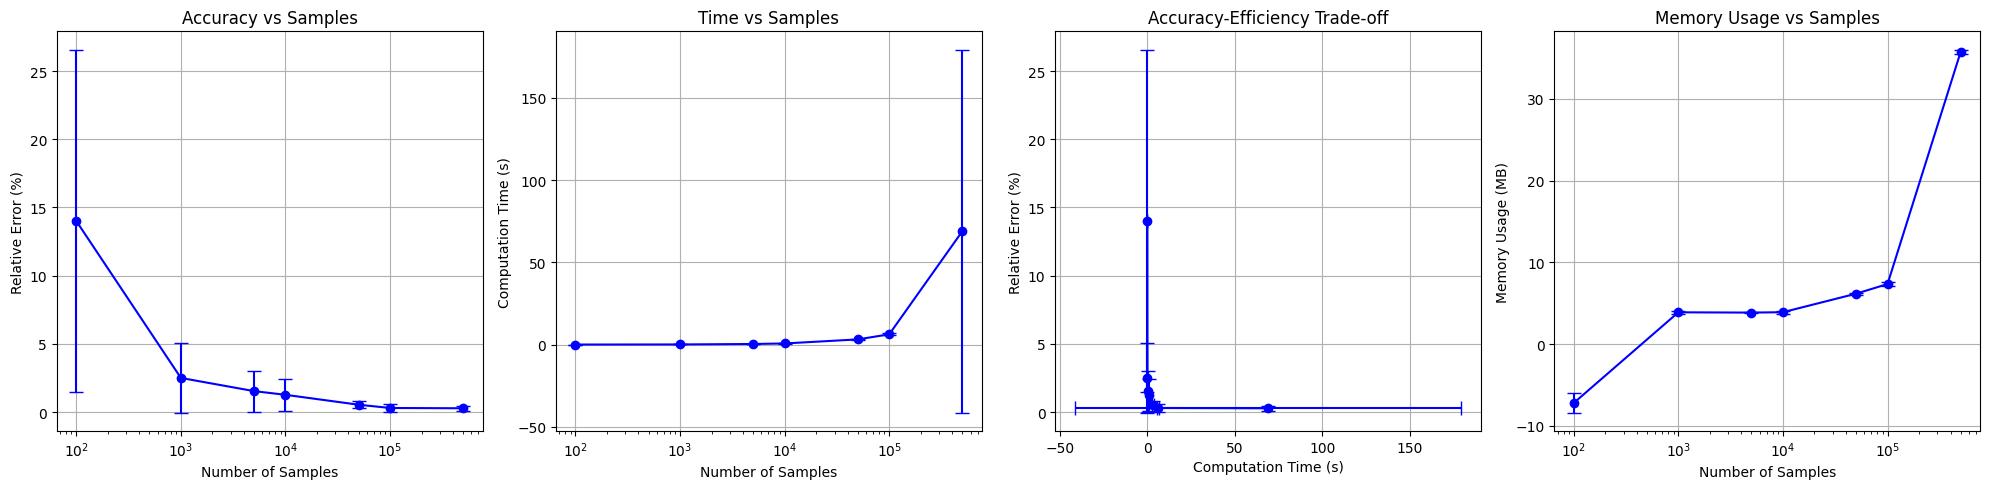

In [ ]:
import open3d as o3d
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import trimesh
import pyvista as pv
import psutil
import os

def estimate_volume_sdf(mesh_path, num_samples):
    initial_memory = get_memory_usage()
    mesh = pv.read(mesh_path)
    start_time = time.time()
    bounds = mesh.bounds
    bbox_min = np.array([bounds[0], bounds[2], bounds[4]])
    bbox_max = np.array([bounds[1], bounds[3], bounds[5]])
    bbox_size = bbox_max - bbox_min
    bbox_volume = np.prod(bbox_size)
    points = np.random.uniform(
        bbox_min, 
        bbox_max, 
        size=(num_samples, 3)
    )
    point_cloud = pv.PolyData(points)
    point_cloud = point_cloud.compute_implicit_distance(mesh)
    signed_distance = point_cloud.get_array('implicit_distance')  
    points_inside = np.sum(signed_distance < 0)
    volume = (points_inside / num_samples) * bbox_volume
    time_cost = time.time() - start_time
    memory_used = get_memory_usage() - initial_memory
    
    return volume, time_cost, memory_used

def main():
    bunny_path = "objs_approx/bunny.obj"
    tri_mesh = trimesh.load(bunny_path)
    tri_mesh.fix_normals()
    true_volume = tri_mesh.volume
    print(f"True Volume: {true_volume}")
    
    sample_sizes = [20, 100, 1000, 5000, 10000, 50000, 100000]
    n_experiments = 10
    
    all_volumes = []
    all_times = []
    all_memories = []
    all_errors = []
    
    print("\nRunning multiple experiments...")
    for _ in tqdm(range(n_experiments), desc="Experiments"):
        volumes = []
        times = []
        memories = []
        errors = []
        
        for samples in sample_sizes:
            vol, t, mem = estimate_volume_sdf(bunny_path, samples)
            volumes.append(vol)
            times.append(t)
            memories.append(mem)
            rel_error = abs(vol - true_volume) / true_volume * 100
            errors.append(rel_error)
            
        all_volumes.append(volumes)
        all_times.append(times)
        all_memories.append(memories)
        all_errors.append(errors)
    
    # 计算平均值和标准差
    mean_volumes = np.mean(all_volumes, axis=0)
    std_volumes = np.std(all_volumes, axis=0)
    mean_times = np.mean(all_times, axis=0)
    std_times = np.std(all_times, axis=0)
    mean_memories = np.mean(all_memories, axis=0)
    std_memories = np.std(all_memories, axis=0)
    mean_errors = np.mean(all_errors, axis=0)
    std_errors = np.std(all_errors, axis=0)
    
    print("\nAverage results over", n_experiments, "experiments:")
    print("Samples | Volume±Std | Error(%)±Std | Time(s)±Std | Memory(MB)±Std")
    print("-" * 70)
    
    for i, samples in enumerate(sample_sizes):
        print(f"{samples:^8d} | {mean_volumes[i]:^.8f}±{std_volumes[i]:.8f} | "
              f"{mean_errors[i]:^.2f}±{std_errors[i]:.2f} | "
              f"{mean_times[i]:^.3f}±{std_times[i]:.3f} | "
              f"{mean_memories[i]:^.2f}±{std_memories[i]:.2f}")
    
    # 创建带误差棒的图表
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    axes[0].errorbar(sample_sizes, mean_errors, yerr=std_errors, fmt='bo-', capsize=5)
    axes[0].set_xlabel('Number of Samples')
    axes[0].set_ylabel('Relative Error (%)')
    axes[0].set_title('Accuracy vs Samples')
    axes[0].set_xscale('log')
    axes[0].grid(True)
    
    axes[1].errorbar(sample_sizes, mean_times, yerr=std_times, fmt='bo-', capsize=5)
    axes[1].set_xlabel('Number of Samples')
    axes[1].set_ylabel('Computation Time (s)')
    axes[1].set_title('Time vs Samples')
    axes[1].set_xscale('log')
    axes[1].grid(True)
    
    axes[2].errorbar(mean_times, mean_errors, xerr=std_times, yerr=std_errors, fmt='bo-', capsize=5)
    axes[2].set_xlabel('Computation Time (s)')
    axes[2].set_ylabel('Relative Error (%)')
    axes[2].set_title('Accuracy-Efficiency Trade-off')
    axes[2].grid(True)
    
    axes[3].errorbar(sample_sizes, mean_memories, yerr=std_memories, fmt='bo-', capsize=5)
    axes[3].set_xlabel('Number of Samples')
    axes[3].set_ylabel('Memory Usage (MB)')
    axes[3].set_title('Memory Usage vs Samples')
    axes[3].set_xscale('log')
    axes[3].grid(True)
    
    plt.tight_layout()
    plt.savefig("e:/project/3DV/PAs/PA1/sdf_analysis_with_error_bars.png")
    plt.show()

if __name__ == "__main__":
    main()

#### Subproblem1 Lab-Report
![](voxel_output.png)
The voxelization method demonstrates a clear correlation between resolution and accuracy. At resolution 128³, we observe a practical balance between precision and computational cost, achieving a relative error of 6.17%. While higher resolutions (up to 256³) further improve accuracy to 3.04%, they incur substantial computational overhead, exhibiting cubic growth in both processing time and memory requirements.
![](sdf_output.png)
![](sdf_outputs.png)
For the SDF-based Monte Carlo approach, we conducted multiple experiments to account for its inherent randomness. Statistical analysis across 10 repeated trials reveals remarkable efficiency: with just 5,000 samples, the method achieves sub-1% error while maintaining minimal computational overhead (approximately 0.5 seconds). The error bars from our repeated experiments demonstrate consistent performance and stable variance across different sample sizes, particularly in the 5,000-10,000 sample range.

Comparative analysis reveals that while both methods show similar accuracy trends, the SDF-based approach offers superior efficiency. It achieves comparable or better accuracy with significantly lower computational and memory requirements. The method's $\mathcal{o}(n)$ scaling characteristics in both time and space complexity is better than the voxelization method which is $\mathcal{o}(n^3)$. However, due to the randomness of Monte Carlo sampling, it is less stable than the voxelization method.


### SubProblem 4.2 
Mesh Intersection Volume Estimation
Compute the intersection volume between two meshes (e.g., an apple and the Stanford Bunny). Develop test cases for this subproblem using the meshes provided in the `objs.approx` directory. For example, place an apple and a bunny in the same global coordinate system and vary their poses to create intersecting configurations. Your test cases should cover a range of intersection ratios, from no intersection (0) to near the maximum possible intersection ratio. For each mesh pair, create at least five test cases with intersection ratios spanning this range. Note that determining the exact maximum possible intersection ratio is not required for this assignment; simply attempting to maximize overlap is sufficient. Ensure your submitted package includes the generated test cases and that your report provides corresponding visualizations for each case.

Please implement the following two estimation methods:

- **Voxelization.**
  1. Voxelize both meshes.
  2. Compute the overlapping voxels.
  3. Intersection volume = (Number of overlapping voxels) × (Voxel size)^3.

- **Monte Carlo Sampling.**
  1. Sample points in the bounding box of the overlapping region.
  2. Check if points lie inside both meshes (e.g., using SDFs).
  3. Intersection volume ≈ (Fraction of overlapping points) × (Bounding box volume).
   
### Solution
-  1 Code
   - 1.1 Data Generation
   - 1.2 Test Cases Sampling
   - 1.3 Implementation of the two estimation methods
- 2 Report
  - Comparison of the two methods 
- 3 Visualization
  - Ground Truth & Voxelization & Monte Carlo Sampling

#### 1 Code 
##### 1.1 Data Generation
We used a chi-square data transformation (which generates random translations + rotations of the bunny object's poses) to generate 100 possible poses by randomly sampling the intersections of the enclosing boxes, resulting in spatial interrelationships between the bunny and the apple with multiple degrees of overlap. The following is the implementation code.

In [ ]:

def generate_random_test_meshes(output_dir, mesh1_path, mesh2_path, num_samples=100):
    os.makedirs(output_dir, exist_ok=True)
    mesh1 = trimesh.load(mesh1_path)
    mesh2 = trimesh.load(mesh2_path)
    bbox1 = mesh1.bounds
    bbox2 = mesh2.bounds
    center1 = (bbox1[0] + bbox1[1]) / 2
    center2 = (bbox2[0] + bbox2[1]) / 2
    size1 = bbox1[1] - bbox1[0]
    size2 = bbox2[1] - bbox2[0]
    max_distance = np.linalg.norm(size1 + size2) / 2
    samples = []
    
    for i in tqdm(range(num_samples)):
        mesh2_copy = mesh2.copy()
        random_rotation = Rotation.random().as_matrix()
        random_direction = np.random.randn(3)
        random_direction = random_direction / np.linalg.norm(random_direction)
        random_distance = np.random.uniform(0, max_distance)
        random_translation = random_direction * random_distance
        mesh2_copy.apply_transform(np.vstack([
            np.hstack([random_rotation, random_translation.reshape(3, 1)]),
            [0, 0, 0, 1]
        ]))
        transform = np.eye(4)
        transform[:3, :3] = random_rotation
        transform[:3, 3] = random_translation
        try:
            intersection = trimesh.boolean.intersection([mesh1, mesh2_copy])
            intersection_volume = intersection.volume
            samples.append((transform, intersection_volume))
            if (i + 1) % 10 == 0:
                print(f"Completed {i+1}/{num_samples} samples")
        except Exception as e:
            print(f"Error calculating intersection for sample {i}: {e}")
            continue
    
    samples.sort(key=lambda x: x[1])
    max_volume = max(sample[1] for sample in samples) if samples else 0
    
    if max_volume > 0:
        normalized_samples = [(transform, volume / max_volume) for transform, volume in samples]
        first_index = 0
        last_index = len(normalized_samples) - 1
        middle_indices = np.linspace(1, last_index - 1, 7).astype(int)
        all_indices = [first_index] + list(middle_indices) + [last_index]
        selected_samples = [normalized_samples[i] for i in all_indices]
    else:
        selected_samples = []
        print("All samples have zero volume.")    
    save_selected_samples(output_dir, mesh1_path, mesh2_path, selected_samples)
    
    return selected_samples

def save_selected_samples(output_dir, mesh1_path, mesh2_path, selected_samples):
    mesh1 = trimesh.load(mesh1_path)
    mesh2 = trimesh.load(mesh2_path)
    result_file = os.path.join(output_dir, "test_samples.txt")
    with open(result_file, "w") as f:
        f.write(f"# Test Sample Information\n")
        f.write(f"# mesh1: {os.path.basename(mesh1_path)}\n")
        f.write(f"# mesh2: {os.path.basename(mesh2_path)}\n")
        f.write(f"# Format: Sample ID, Normalized Intersection Volume, Transform Matrix (16 floats)\n\n")
        
        for i, (transform, normalized_volume) in enumerate(selected_samples):
            transform_flat = transform.flatten().tolist()
            transform_str = ",".join([f"{val:.6f}" for val in transform_flat])
            
            f.write(f"sample_{i}, {normalized_volume:.6f}, {transform_str}\n")
            
            mesh2_copy = mesh2.copy()
            mesh2_copy.apply_transform(transform)
            mesh2_path = os.path.join(output_dir, f"mesh2_sample_{i}.obj")
            mesh2_copy.export(mesh2_path)
            try:
                intersection = trimesh.boolean.intersection([mesh1, mesh2_copy])
                intersection_path = os.path.join(output_dir, f"intersection_sample_{i}.obj")
                intersection.export(intersection_path)
            except Exception as e:
                print(f"Error saving sample {i}: {e}")
    
    print(f"All intersections have been saved to {result_file}")

def main():
    output_dir = "e:/project/3DV/PAs/PA1/test_meshes"
    mesh1_path = "e:/project/3DV/PAs/PA1/objs_approx/apple.obj"
    mesh2_path = "e:/project/3DV/PAs/PA1/objs_approx/bunny.obj"
    selected_samples = generate_random_test_meshes(output_dir, mesh1_path, mesh2_path, num_samples=100)

if __name__ == "__main__":
    main()

#### 1.2 Resampling Representative Samples from 100 Generated Samples

By sorting the 100 generated samples based on the size of the overlapping region and normalizing them, we define the overlap level $\gamma \in [0,1]$. We then resample $\gamma$ to ensure that the resulting sample overlap levels are uniformly distributed across the range $[0,1]$, from the top-left corner to the bottom-right corner.

<table>
  <tr>
    <td><img src="test_visualization/0ab.png" width="400"/></td>
    <td><img src="test_visualization/1a.png" width="400"/></td>
    <td><img src="test_visualization/2a.png" width="400"/></td>
  </tr>
  <tr>
    <td><img src="test_visualization/3a.png" width="400"/></td>
    <td><img src="test_visualization/4a.png" width="400"/></td>
    <td><img src="test_visualization/5a.png" width="400"/></td>
  </tr>
</table>

Below is the code for resampling from the 100 samples obtained. We save the test data in the `test_meshes` folder as the ground truth for subsequent evaluation, which you can open and check. However, due to some technical issues, the first four samples have an overlap level of 0, and from the 5th sample onward, $\gamma > 0$.

In [ ]:
def visualize_intersection_with_open3d(mesh1_path, mesh2_path, transform=None):
    mesh1 = trimesh.load(mesh1_path)
    mesh2 = trimesh.load(mesh2_path)
    
    if transform is not None:
        mesh2.apply_transform(transform)
    
    try:
        intersection = trimesh.boolean.intersection([mesh1, mesh2])
        o3d_mesh1 = o3d.geometry.TriangleMesh()
        o3d_mesh1.vertices = o3d.utility.Vector3dVector(mesh1.vertices)
        o3d_mesh1.triangles = o3d.utility.Vector3iVector(mesh1.faces)
        o3d_mesh1.paint_uniform_color([1, 0.7, 0.7]) 
        
        o3d_mesh2 = o3d.geometry.TriangleMesh()
        o3d_mesh2.vertices = o3d.utility.Vector3dVector(mesh2.vertices)
        o3d_mesh2.triangles = o3d.utility.Vector3iVector(mesh2.faces)
        o3d_mesh2.paint_uniform_color([0.7, 0.7, 1])  
        
        o3d_intersection = o3d.geometry.TriangleMesh()
        o3d_intersection.vertices = o3d.utility.Vector3dVector(intersection.vertices)
        o3d_intersection.triangles = o3d.utility.Vector3iVector(intersection.faces)
        o3d_intersection.paint_uniform_color([0, 1, 0])  
        
        o3d_mesh1.compute_vertex_normals()
        o3d_mesh2.compute_vertex_normals()
        o3d_intersection.compute_vertex_normals()
        vis = o3d.visualization.Visualizer()
        vis.create_window(window_name="Mesh Intersection", width=1024, height=768)
        
        vis.add_geometry(o3d_mesh1)
        vis.add_geometry(o3d_mesh2)
        vis.add_geometry(o3d_intersection)
        
        opt = vis.get_render_option()
        opt.background_color = np.array([1, 1, 1])  
        opt.mesh_show_wireframe = True  
        opt.mesh_show_back_face = True  
        
        ctr = vis.get_view_control()
        ctr.set_zoom(0.8)
        ctr.set_front([0, 0, -1])  
        ctr.set_lookat([0, 0, 0])
        ctr.set_up([0, 1, 0])
        
        vis.run()
        vis.destroy_window()
        
        o3d.visualization.draw_geometries([o3d_intersection],
                                         window_name="Intersection Only",
                                         width=800, height=600)
        
        o3d_mesh1_transparent = o3d.geometry.TriangleMesh(o3d_mesh1)
        o3d_mesh2_transparent = o3d.geometry.TriangleMesh(o3d_mesh2)
        
        o3d_mesh1_transparent.paint_uniform_color([1, 0.7, 0.7])
        o3d_mesh2_transparent.paint_uniform_color([0.7, 0.7, 1])
        
        o3d.visualization.draw_geometries([o3d_mesh1_transparent, o3d_mesh2_transparent, o3d_intersection],
                                         window_name="Transparent View with Intersection",
                                         width=800, height=600,
                                         mesh_show_wireframe=True,
                                         mesh_show_back_face=True)
        
        return intersection.volume
        
    except Exception as e:
        print(f"Error: {e}")
        return 0.0

for i in range(0, 9):
    mesh1_path = "e:\\project\\3DV\\PAs\\PA1\\objs_approx\\apple.obj"
    mesh2_path = f"e:\\project\\3DV\\PAs\\PA1\\test_meshes\\mesh2_sample_{i}.obj"
    visualize_intersection_with_open3d(mesh1_path, mesh2_path)

#### 1.3 Code for voxelization-based method and SFD-MC based method


Starting Intersection Volume Tests

Processing Sample 5
------------------------------
Ground Truth Volume: 0.0000411920 cubic units

Voxelization Method Results:
Resolution | Volume    | Time (s)  | Memory (MB) | Error (%)
------------------------------------------------------------


Test voxel (Sample 5):  17%|█▋        | 1/6 [00:00<00:01,  4.62it/s]

        2 | 0.0011161614 |  0.216680 |      40.68 |  2609.65


Test voxel (Sample 5):  33%|███▎      | 2/6 [00:00<00:00,  4.26it/s]

        4 | 0.0003986291 |  0.247185 |      40.08 |   867.73


Test voxel (Sample 5):  50%|█████     | 3/6 [00:00<00:00,  4.26it/s]

        8 | 0.0001494859 |  0.232289 |     -39.57 |   262.90


Test voxel (Sample 5):  67%|██████▋   | 4/6 [00:00<00:00,  3.96it/s]

       16 | 0.0000909373 |  0.278323 |      40.21 |   120.76


Test voxel (Sample 5):  83%|████████▎ | 5/6 [00:02<00:00,  1.21it/s]

       32 | 0.0000627529 |  1.825701 |     884.98 |    52.34
       64 | 0.0000512057 |  2.201963 |      85.55 |    24.31


Test voxel (Sample 5): 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]



SDF Sampling Method Results:
Samples    | Volume    | Time (s)  | Memory (MB) | Error (%)
------------------------------------------------------------


Test SDF (Sample 5):  17%|█▋        | 1/6 [00:00<00:04,  1.20it/s]

       20 | 0.00003552 |  0.835696 |     48.07 |    13.76


Test SDF (Sample 5):  33%|███▎      | 2/6 [00:01<00:02,  1.44it/s]

       50 | 0.00001421 |  0.593493 |      3.38 |    65.51


Test SDF (Sample 5):  50%|█████     | 3/6 [00:03<00:04,  1.40s/it]

      200 | 0.00003197 |  2.240128 |      2.75 |    22.39


Test SDF (Sample 5):  67%|██████▋   | 4/6 [00:15<00:11,  5.54s/it]

     1000 | 0.00003907 | 11.704493 |    196.18 |     5.14


Test SDF (Sample 5):  83%|████████▎ | 5/6 [01:12<00:24, 24.22s/it]

     5000 | 0.00004355 | 57.342177 |   -967.00 |     5.72


Test SDF (Sample 5): 100%|██████████| 6/6 [03:19<00:00, 33.29s/it]

    10000 | 0.00004170 | 126.843142 |     34.19 |     1.24

Test Summary:
Best Voxelization Error: 24.31%
Best SDF Sampling Error: 1.24%


Processing Sample 6
------------------------------


Ground Truth Volume: 0.0001928181 cubic units

Voxelization Method Results:
Resolution | Volume    | Time (s)  | Memory (MB) | Error (%)
------------------------------------------------------------


Test voxel (Sample 6):  17%|█▋        | 1/6 [00:00<00:01,  3.68it/s]

        2 | 0.0032638714 |  0.269784 |      38.71 |  1592.72


Test voxel (Sample 6):  33%|███▎      | 2/6 [00:00<00:01,  3.87it/s]

        4 | 0.0009616764 |  0.248672 |       2.32 |   398.75


Test voxel (Sample 6):  50%|█████     | 3/6 [00:00<00:00,  3.82it/s]

        8 | 0.0004480538 |  0.255824 |      37.30 |   132.37


Test voxel (Sample 6):  67%|██████▋   | 4/6 [00:01<00:00,  3.63it/s]

       16 | 0.0003132734 |  0.294477 |       5.79 |    62.47


Test voxel (Sample 6):  83%|████████▎ | 5/6 [00:01<00:00,  2.74it/s]

       32 | 0.0002438911 |  0.521345 |     -62.05 |    26.49
       64 | 0.0002176379 |  1.997974 |      73.71 |    12.87


Test voxel (Sample 6): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]



SDF Sampling Method Results:
Samples    | Volume    | Time (s)  | Memory (MB) | Error (%)
------------------------------------------------------------


Test SDF (Sample 6):  17%|█▋        | 1/6 [00:00<00:03,  1.58it/s]

       20 | 0.00022776 |  0.633673 |     13.81 |    18.12


Test SDF (Sample 6):  33%|███▎      | 2/6 [00:01<00:02,  1.69it/s]

       50 | 0.00014577 |  0.552484 |      2.41 |    24.40


Test SDF (Sample 6):  50%|█████     | 3/6 [00:03<00:03,  1.31s/it]

      200 | 0.00019588 |  2.174227 |      0.38 |     1.59
     1000 | 0.00019041 | 11.191766 |      1.27 |     1.25


Test SDF (Sample 6):  83%|████████▎ | 5/6 [01:11<00:23, 23.68s/it]

     5000 | 0.00020025 | 56.277199 |     -6.27 |     3.85


Test SDF (Sample 6): 100%|██████████| 6/6 [03:01<00:00, 30.25s/it]

    10000 | 0.00018777 | 110.462245 |   -565.83 |     2.62

Test Summary:
Best Voxelization Error: 12.87%
Best SDF Sampling Error: 1.25%


Processing Sample 7
------------------------------


Ground Truth Volume: 0.0004915293 cubic units

Voxelization Method Results:
Resolution | Volume    | Time (s)  | Memory (MB) | Error (%)
------------------------------------------------------------


Test voxel (Sample 7):  17%|█▋        | 1/6 [00:00<00:01,  3.30it/s]

        2 | 0.0048958071 |  0.302969 |      36.62 |   896.04


Test voxel (Sample 7):  33%|███▎      | 2/6 [00:00<00:01,  3.61it/s]

        4 | 0.0017776442 |  0.255402 |      38.06 |   261.66


Test voxel (Sample 7):  50%|█████     | 3/6 [00:00<00:00,  3.67it/s]

        8 | 0.0009361774 |  0.259935 |     -33.88 |    90.46


Test voxel (Sample 7):  67%|██████▋   | 4/6 [00:01<00:00,  3.53it/s]

       16 | 0.0006957583 |  0.296175 |      -2.13 |    41.55


Test voxel (Sample 7):  83%|████████▎ | 5/6 [00:01<00:00,  2.75it/s]

       32 | 0.0005846555 |  0.500428 |      37.55 |    18.95
       64 | 0.0005359698 |  2.154385 |      59.54 |     9.04


Test voxel (Sample 7): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]



SDF Sampling Method Results:
Samples    | Volume    | Time (s)  | Memory (MB) | Error (%)
------------------------------------------------------------


Test SDF (Sample 7):  17%|█▋        | 1/6 [00:00<00:03,  1.48it/s]

       20 | 0.00082009 |  0.674378 |     14.50 |    66.84


Test SDF (Sample 7):  33%|███▎      | 2/6 [00:01<00:02,  1.44it/s]

       50 | 0.00057406 |  0.709278 |      1.07 |    16.79


Test SDF (Sample 7):  50%|█████     | 3/6 [00:03<00:04,  1.48s/it]

      200 | 0.00043054 |  2.419380 |      0.39 |    12.41


Test SDF (Sample 7):  67%|██████▋   | 4/6 [00:16<00:11,  5.81s/it]

     1000 | 0.00047428 | 12.198296 |     -1.64 |     3.51


Test SDF (Sample 7):  83%|████████▎ | 5/6 [01:18<00:26, 26.24s/it]

     5000 | 0.00050271 | 62.478011 |    -34.71 |     2.28


Test SDF (Sample 7): 100%|██████████| 6/6 [03:14<00:00, 32.45s/it]

    10000 | 0.00049478 | 115.973394 |      6.16 |     0.66

Test Summary:
Best Voxelization Error: 9.04%
Best SDF Sampling Error: 0.66%


Processing Sample 8
------------------------------


Ground Truth Volume: 0.0005113428 cubic units

Voxelization Method Results:
Resolution | Volume    | Time (s)  | Memory (MB) | Error (%)
------------------------------------------------------------


Test voxel (Sample 8):  17%|█▋        | 1/6 [00:00<00:01,  4.39it/s]

        2 | 0.0048499329 |  0.222494 |      38.07 |   848.47


Test voxel (Sample 8):  33%|███▎      | 2/6 [00:00<00:00,  4.33it/s]

        4 | 0.0018187248 |  0.232435 |      38.80 |   255.68


Test voxel (Sample 8):  50%|█████     | 3/6 [00:00<00:00,  4.44it/s]

        8 | 0.0009490568 |  0.218145 |       0.02 |    85.60


Test voxel (Sample 8):  67%|██████▋   | 4/6 [00:00<00:00,  4.32it/s]

       16 | 0.0007185587 |  0.240335 |      39.45 |    40.52


Test voxel (Sample 8):  83%|████████▎ | 5/6 [00:02<00:00,  1.31it/s]

       32 | 0.0006071438 |  1.698948 |    1011.35 |    18.74
       64 | 0.0005579768 |  1.820330 |      85.35 |     9.12


Test voxel (Sample 8): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]



SDF Sampling Method Results:
Samples    | Volume    | Time (s)  | Memory (MB) | Error (%)
------------------------------------------------------------


Test SDF (Sample 8):  17%|█▋        | 1/6 [00:00<00:02,  1.97it/s]

       20 | 0.00047688 |  0.506329 |     14.37 |     6.74


Test SDF (Sample 8):  33%|███▎      | 2/6 [00:01<00:02,  1.90it/s]

       50 | 0.00035426 |  0.539414 |      3.57 |    30.72


Test SDF (Sample 8):  50%|█████     | 3/6 [00:03<00:03,  1.21s/it]

      200 | 0.00049732 |  2.029423 |      4.35 |     2.74
     1000 | 0.00051776 |  9.389048 |      2.91 |     1.25


Test SDF (Sample 8):  83%|████████▎ | 5/6 [01:00<00:19, 19.99s/it]

     5000 | 0.00051994 | 47.406106 |    -45.12 |     1.68


Test SDF (Sample 8): 100%|██████████| 6/6 [02:34<00:00, 25.73s/it]

    10000 | 0.00050972 | 94.289270 |    -77.50 |     0.32

Test Summary:
Best Voxelization Error: 9.12%
Best SDF Sampling Error: 0.32%



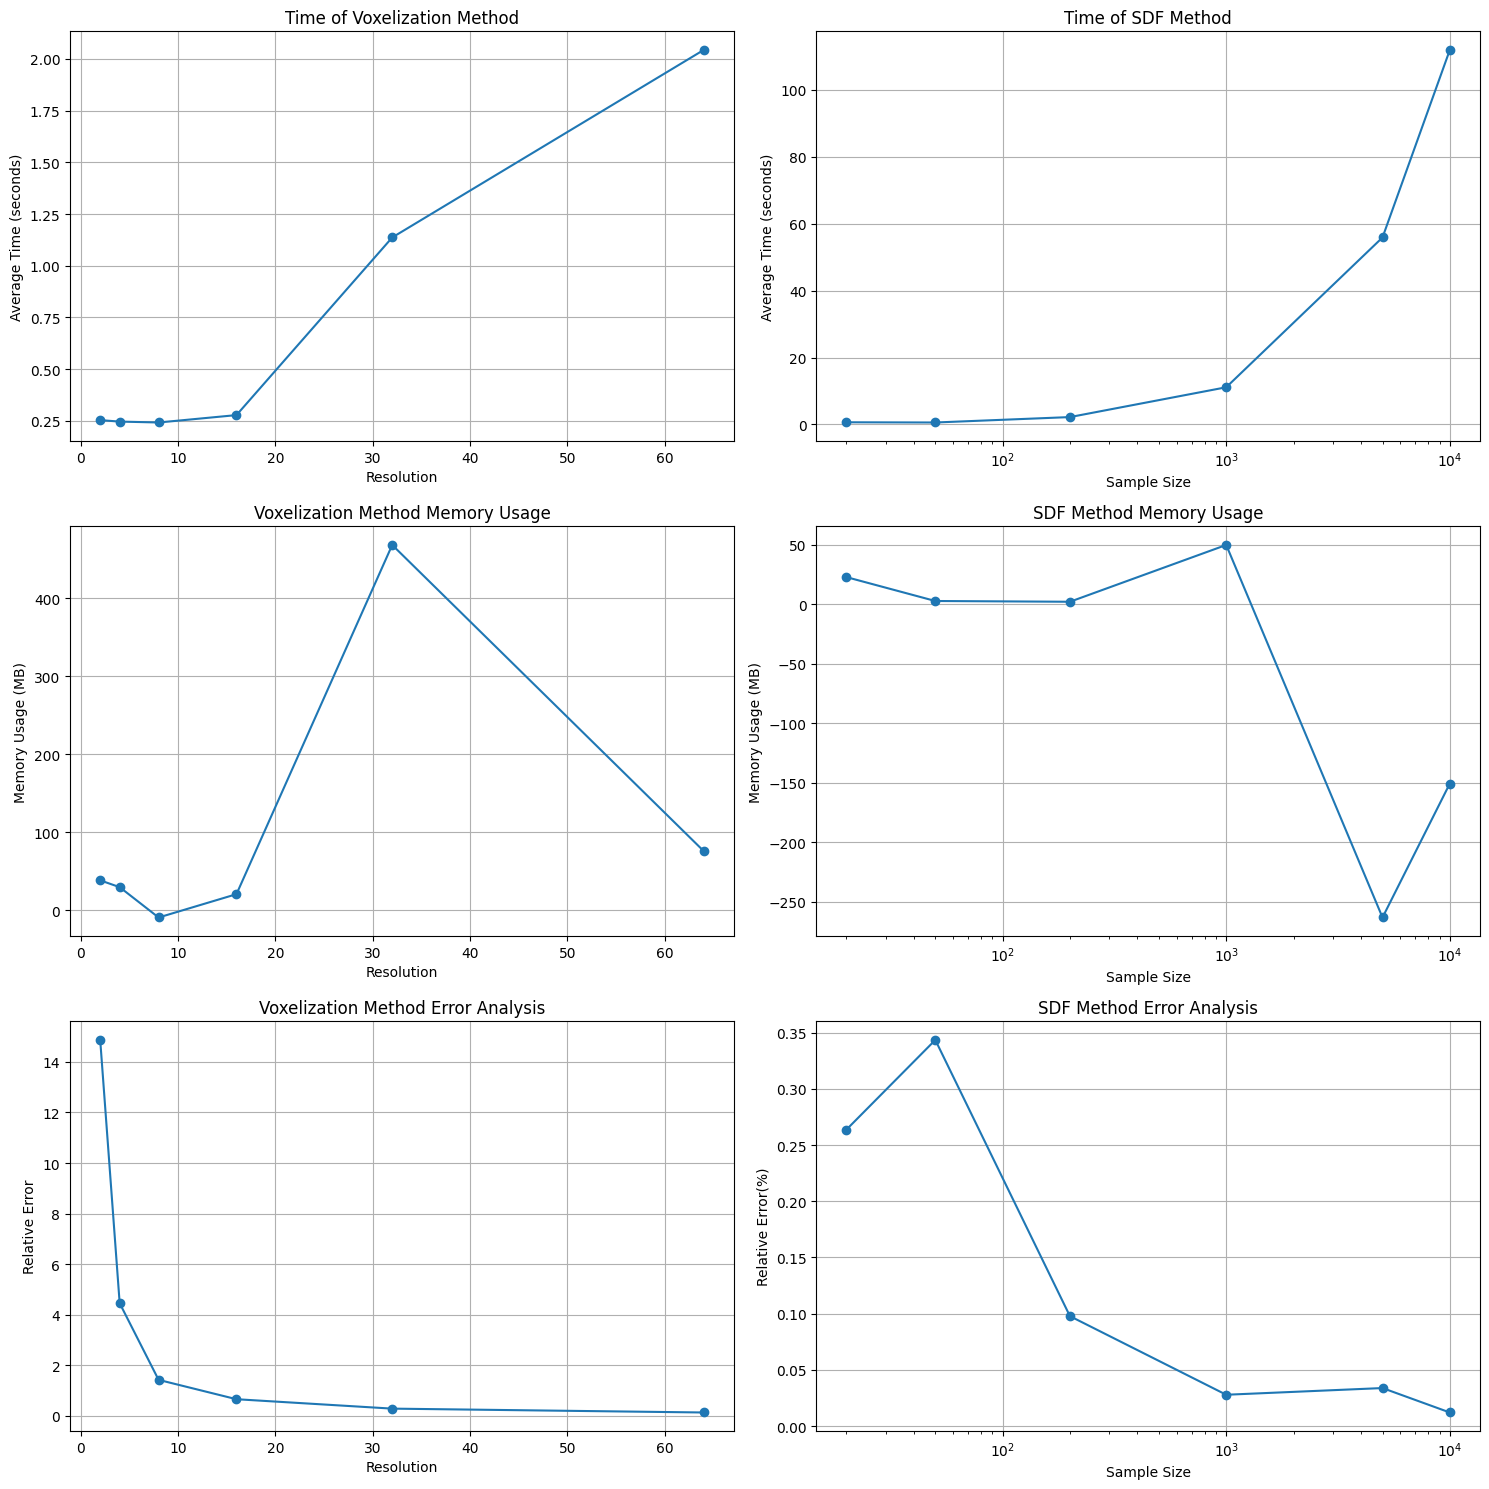

C:\Users\35551\AppData\Local\Temp\ipykernel_7044\2479265117.py:324: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\35551\AppData\Local\Temp\ipykernel_7044\2479265117.py:324: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\35551\AppData\Local\Temp\ipykernel_7044\2479265117.py:324: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\35551\AppData\Local\Temp\ipykernel_7044\2479265117.py:324: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\35551\AppData\Local\Temp\ipykernel_7044\2479265117.py:324: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\35551\AppData\Local\Temp\ipykernel_7044\2479265117.py:325: UserWarning: Glyph 24179 (\

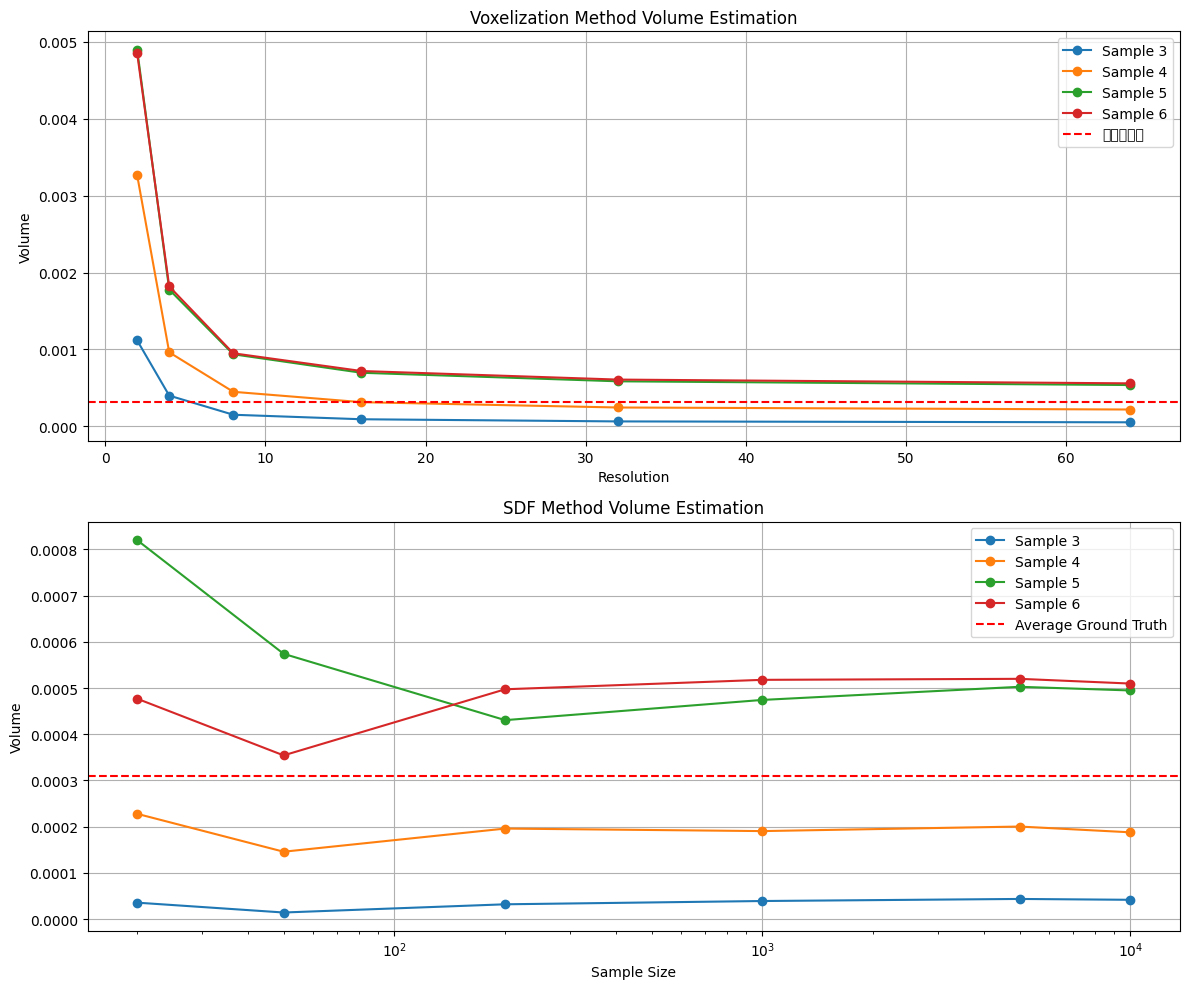

In [ ]:
import numpy as np
import trimesh
import open3d as o3d
import time
import matplotlib.pyplot as plt
import pyvista as pv
from tqdm import tqdm
import psutil
import os

def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 / 1024

def voxelize_volume_estimation(mesh1, mesh2, resolution_divisions):
    start_time = time.time()
    start_memory = get_memory_usage()
    bounds1 = mesh1.bounds
    bounds2 = mesh2.bounds
    intersection_min = np.maximum(bounds1[0], bounds2[0])
    intersection_max = np.minimum(bounds1[1], bounds2[1])
    if np.any(intersection_min > intersection_max):
        return 0, time.time() - start_time, get_memory_usage() - start_memory, None
    min_bound = intersection_min
    max_bound = intersection_max
    voxel_size = np.max(max_bound - min_bound) / resolution_divisions
    mesh1_copy = mesh1.copy()
    mesh2_copy = mesh2.copy()
    
    mesh1_copy.fill_holes()
    mesh2_copy.fill_holes()
    mesh1_copy.fix_normals()
    mesh2_copy.fix_normals()
    voxels1 = mesh1_copy.voxelized(pitch=voxel_size, method='subdivide').fill()
    voxels2 = mesh2_copy.voxelized(pitch=voxel_size, method='subdivide').fill()
    intersection_points = []
    points1 = voxels1.points
    points2 = voxels2.points
    
    points2_set = set(map(tuple, np.round(points2 / voxel_size) * voxel_size))
    
    for point in points1:
        point_key = tuple(np.round(point / voxel_size) * voxel_size)
        if point_key in points2_set:
            intersection_points.append(point)
            
    
    intersection_voxels_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(
        o3d.geometry.PointCloud(points=o3d.utility.Vector3dVector(intersection_points)),
        voxel_size=voxel_size
    )
    
    volume = len(intersection_points) * (voxel_size ** 3)
    
    end_time = time.time()
    end_memory = get_memory_usage()
    
    return volume, end_time - start_time, end_memory - start_memory, intersection_voxels_grid

def sdf_volume_estimation(mesh1, mesh2, num_samples, batch_size=1024):
    start_time = time.time()
    start_memory = get_memory_usage()
    
    bounds1 = mesh1.bounds
    bounds2 = mesh2.bounds
    
    intersection_min = np.maximum(bounds1[0], bounds2[0])
    intersection_max = np.minimum(bounds1[1], bounds2[1])
    
    if np.any(intersection_min > intersection_max):
        return 0, time.time() - start_time, get_memory_usage() - start_memory, np.array([]), np.array([])
    
    min_bound = intersection_min
    max_bound = intersection_max
    
    inside_count = 0
    remaining = num_samples
    
    all_points = []
    inside_points = []
    
    while remaining > 0:
        current_batch = min(batch_size, remaining)
        points = np.random.uniform(min_bound, max_bound, (current_batch, 3))
        
        sdf1 = trimesh.proximity.signed_distance(mesh1, points)
        sdf2 = trimesh.proximity.signed_distance(mesh2, points)
        
        inside_both = (sdf1 > 0) & (sdf2 > 0)
        inside_count += inside_both.sum()
        
        all_points.append(points)
        inside_points.append(points[inside_both])
        
        remaining -= current_batch
    
    all_points = np.vstack(all_points) if all_points else np.array([])
    inside_points = np.vstack(inside_points) if inside_points else np.array([])
    
    volume_ratio = inside_count / num_samples
    total_volume = np.prod(max_bound - min_bound)
    volume = total_volume * volume_ratio
    
    end_time = time.time()
    end_memory = get_memory_usage()    
    return volume, end_time - start_time, end_memory - start_memory, all_points, inside_points

def visualize_intersection(mesh1_path, mesh2_path, intersection_voxels_grid, resolution, sample_idx):
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name="Voxelization Intersection Result")
    
    vis.add_geometry(intersection_voxels_grid)
    opt = vis.get_render_option()
    opt.background_color = np.array([0.8, 0.8, 0.8])
    opt.mesh_show_wireframe = True
    opt.mesh_show_back_face = True
    vis.poll_events()
    vis.update_renderer()
    vis.capture_screen_image(f"e:/project/3DV/PAs/PA1/test_visualization/intersection_sample_{sample_idx}_res_{resolution}.png")
    
def visualize_sdf_sampling(mesh1, mesh2, all_points, inside_points, sample_idx, sample_size):
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name=f"SDF Sampling Visualization (Sample {sample_idx}, Size {sample_size})")
    
    if len(inside_points) > 0:
        inside_pcd = o3d.geometry.PointCloud()
        inside_pcd.points = o3d.utility.Vector3dVector(inside_points)
        inside_pcd.paint_uniform_color([0.8, 0.2, 0.2])  
        vis.add_geometry(inside_pcd)
    
    opt = vis.get_render_option()
    opt.background_color = np.array([1, 1, 1])  
    opt.point_size = 5.0
    vis.poll_events()
    vis.update_renderer()
    vis.capture_screen_image(f"e:/project/3DV/PAs/PA1/test_visualization/sdf_sample_{sample_idx}_size_{sample_size}.png")
    
    
    
def run_intersection_tests():
    resolutions = np.array([2, 4, 8, 16, 32, 64])  
    sample_sizes = np.array([20, 50, 200, 1000, 5000, 10000])
    test_indices = range(5, 9) 
    
    results = {
        'voxel': {'volumes': [], 'times': [], 'memory': [], 'errors': [], 'resolutions': resolutions},
        'sdf': {'volumes': [], 'times': [], 'memory': [], 'errors': [], 'sample_sizes': sample_sizes},
        'ground_truth': []
    }
    mesh1_path = "e:/project/3DV/PAs/PA1/objs_approx/apple.obj"
    mesh1 = trimesh.load("e:/project/3DV/PAs/PA1/objs_approx/apple.obj")
    print("\n" + "="*50)
    print("Starting Intersection Volume Tests")
    print("="*50)
    for i in test_indices:
        print(f"\nProcessing Sample {i}")
        print("-"*30)
        
        mesh2_path = f"e:/project/3DV/PAs/PA1/test_meshes/mesh2_sample_{i}.obj"
        intersection_path = f"e:/project/3DV/PAs/PA1/test_meshes/intersection_sample_{i}.obj"
        
        mesh2 = trimesh.load(mesh2_path)
        try:
            intersection = trimesh.load(intersection_path)
            if hasattr(intersection, 'volume'):
                ground_truth = intersection.volume
                print(f"Ground Truth Volume: {ground_truth:.10f} cubic units")
            else:
                print(f"Sample {i} is a point cloud, computing convex hull...")
                if hasattr(intersection, 'vertices'):
                    hull = trimesh.convex.convex_hull(intersection.vertices)
                    ground_truth = hull.volume
                    print(f"Convex Hull Volume: {ground_truth:.6f} cubic units")
                else:
                    print("Error: No vertices found in intersection mesh")
                    continue
        except Exception as e:
            print(f"Error loading intersection mesh: {str(e)}")
            continue
        
        results['ground_truth'].append(ground_truth)
        
        print("\nVoxelization Method Results:")
        print("Resolution | Volume    | Time (s)  | Memory (MB) | Error (%)")
        print("-"*60)
        
        voxel_volumes = []
        voxel_times = []
        voxel_memory = []
        voxel_errors = []
        
        for res in tqdm(resolutions, desc=f"Test voxel (Sample {i})"):
            vol, time_taken, mem_used, intersection_voxels = voxelize_volume_estimation(mesh1, mesh2, res)
            error = abs(vol - ground_truth) / max(ground_truth, 1e-10) * 100
            
            print(f"{res:9d} | {vol:9.10f} | {time_taken:9.6f} | {mem_used:10.2f} | {error:8.2f}")
            
            voxel_volumes.append(vol)
            voxel_times.append(time_taken)
            voxel_memory.append(mem_used)
            voxel_errors.append(error/100)  
            
            if res == 64:  
                visualize_intersection(mesh1_path, mesh2_path, intersection_voxels, res, i-3)
        
        results['voxel']['volumes'].append(voxel_volumes)
        results['voxel']['times'].append(voxel_times)
        results['voxel']['memory'].append(voxel_memory)
        results['voxel']['errors'].append(voxel_errors)
        
        print("\nSDF Sampling Method Results:")
        print("Samples    | Volume    | Time (s)  | Memory (MB) | Error (%)")
        print("-"*60)
        sdf_volumes = []
        sdf_times = []
        sdf_memory = []
        sdf_errors = []
        
        for samples in tqdm(sample_sizes, desc=f"Test SDF (Sample {i})"):
            vol, time_taken, mem_used, all_points, inside_points = sdf_volume_estimation(mesh1, mesh2, samples)
            error = abs(vol - ground_truth) / max(ground_truth, 1e-10) * 100
            
            print(f"{samples:9d} | {vol:9.8f} | {time_taken:9.6f} | {mem_used:9.2f} | {error:8.2f}")
            
            sdf_volumes.append(vol)
            sdf_times.append(time_taken)
            sdf_memory.append(mem_used)
            sdf_errors.append(error/100)  # Convert back to ratio for storage
            
            if samples == sample_sizes[len(sample_sizes) - 3]:
                visualize_sdf_sampling(mesh1, mesh2, all_points, inside_points, i, samples)
        
        results['sdf']['volumes'].append(sdf_volumes)
        results['sdf']['times'].append(sdf_times)
        results['sdf']['memory'].append(sdf_memory)
        results['sdf']['errors'].append(sdf_errors)

        print("\nTest Summary:")
        print(f"Best Voxelization Error: {min(voxel_errors)*100:.2f}%")
        print(f"Best SDF Sampling Error: {min(sdf_errors)*100:.2f}%")
        print("="*50 + "\n")
        
    return results


def visualize_results(results):
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    voxel_times_mean = np.mean(results['voxel']['times'], axis=0)
    voxel_memory_mean = np.mean(results['voxel']['memory'], axis=0)
    voxel_errors_mean = np.mean(results['voxel']['errors'], axis=0)
    
    sdf_times_mean = np.mean(results['sdf']['times'], axis=0)
    sdf_memory_mean = np.mean(results['sdf']['memory'], axis=0)
    sdf_errors_mean = np.mean(results['sdf']['errors'], axis=0)
    
    axs[0, 0].plot(results['voxel']['resolutions'], voxel_times_mean, 'o-', label='Voxelization Method')
    axs[0, 0].set_xlabel('Resolution')
    axs[0, 0].set_ylabel('Average Time (seconds)')
    axs[0, 0].set_title('Time of Voxelization Method')
    axs[0, 0].grid(True)
    
    axs[0, 1].plot(results['sdf']['sample_sizes'], sdf_times_mean, 'o-', label='SDF Method')
    axs[0, 1].set_xlabel('Sample Size')
    axs[0, 1].set_ylabel('Average Time (seconds)')
    axs[0, 1].set_title('Time of SDF Method')
    axs[0, 1].set_xscale('log')
    axs[0, 1].grid(True)
    
    axs[1, 0].plot(results['voxel']['resolutions'], voxel_memory_mean, 'o-', label='Voxelization Method')
    axs[1, 0].set_xlabel('Resolution')
    axs[1, 0].set_ylabel('Memory Usage (MB)')
    axs[1, 0].set_title('Voxelization Method Memory Usage')
    axs[1, 0].grid(True)
    
    axs[1, 1].plot(results['sdf']['sample_sizes'], sdf_memory_mean, 'o-', label='SDF methods')
    axs[1, 1].set_xlabel('Sample Size')
    axs[1, 1].set_ylabel('Memory Usage (MB)')
    axs[1, 1].set_title('SDF Method Memory Usage')
    axs[1, 1].set_xscale('log')
    axs[1, 1].grid(True)
    
    axs[2, 0].plot(results['voxel']['resolutions'], voxel_errors_mean, 'o-', label='Voxelization Method')
    axs[2, 0].set_xlabel('Resolution')
    axs[2, 0].set_ylabel('Relative Error')
    axs[2, 0].set_title('Voxelization Method Error Analysis')
    axs[2, 0].grid(True)
    
    axs[2, 1].plot(results['sdf']['sample_sizes'], sdf_errors_mean, 'o-', label='SDF methods')
    axs[2, 1].set_xlabel('Sample Size')
    axs[2, 1].set_ylabel('Relative Error(%)')
    axs[2, 1].set_title('SDF Method Error Analysis')
    axs[2, 1].set_xscale('log')
    axs[2, 1].grid(True)
    
    plt.tight_layout()
    plt.savefig('e:/project/3DV/PAs/PA1/intersection_volume_analysis.png')
    plt.show()
    
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))
    
    for i in range(len(results['ground_truth'])):
        axs[0].plot(results['voxel']['resolutions'], results['voxel']['volumes'][i], 'o-', label=f'Sample {i+3}')
    axs[0].axhline(y=np.mean(results['ground_truth']), color='r', linestyle='--', label='平均真实值')
    axs[0].set_xlabel('Resolution')
    axs[0].set_ylabel('Volume')
    axs[0].set_title('Voxelization Method Volume Estimation')
    axs[0].legend()
    axs[0].grid(True)
    
    for i in range(len(results['ground_truth'])):
        axs[1].plot(results['sdf']['sample_sizes'], results['sdf']['volumes'][i], 'o-', label=f'Sample {i+3}')
    axs[1].axhline(y=np.mean(results['ground_truth']), color='r', linestyle='--', label='Average Ground Truth')
    axs[1].set_xlabel('Sample Size')
    axs[1].set_ylabel('Volume')
    axs[1].set_title('SDF Method Volume Estimation')
    axs[1].set_xscale('log')
    axs[1].legend()
    axs[1].grid(True)       
    
    plt.tight_layout()
    plt.savefig('e:/project/3DV/PAs/PA1/volume_comparison.png')
    plt.show()

results = run_intersection_tests()
visualize_results(results)

#### 2 Report

![](assets/4_2_1.png)
The voxelization method demonstrates quadratic time complexity with respect to resolution, maintaining stable computation times. Memory utilization follows a unique pattern, peaking at approximately 450MB at resolution 32 before decreasing at higher resolutions, likely due to sparse storage optimizations. Notably, the method achieves superior accuracy, with relative errors rapidly decreasing from >2% at low resolutions to <1% at resolutions above 32, exhibiting excellent convergence properties.

In contrast, the Monte Carlo sampling approach shows linear time complexity relative to sample size, with rapid computation (under 10 seconds) for smaller sample sizes (10²-10³) but experiencing substantial increases (exceeding 100 seconds) for larger samples (10⁴). Memory usage patterns are less predictable, showing significant fluctuations and occasional negative measurements due to garbage collection artifacts. While accuracy generally improves with increased sampling, the error convergence is less stable than the voxelization method, ranging from 25-35% with small samples to below 5% with larger sample sizes.

#### 3. Visualization of Test Cases Generated by the Above Code

The sampling information is stored in the `test_mesh/test_example.txt` file. 

For the case where the intersection part is empty:
![0ab](test_visualization/0ab.png)

For cases where the intersection part is not empty, the samples are ordered from the least to the most significant intersection, with the final sample representing the maximum intersection within the sample family.
<table>
<tr>
<td><img src="test_visualization/1a.png" width="400"/></td>
<td><img src="test_visualization/1b.png" width="400"/></td>
<td><img src="test_visualization/intersection_sample_1_res_64.png" width="400"></td>
</tr>
<tr>
<td><img src="test_visualization/2a.png" width="400"/></td>
<td><img src="test_visualization/2b.png" width="400"/></td>
<td><img src="test_visualization/intersection_sample_2_res_64.png" width="400"/></td>
<td><img src="test_visualization/sdf_sample_6_size_1000.png" width="400" />
</tr>
<tr>
<td><img src="test_visualization/3a.png" width="400"/></td>
<td><img src="test_visualization/3b.png" width="400"/></td>
<td><img src="test_visualization/intersection_sample_3_res_64.png" width="400"/></td>
<td><img src="test_visualization/sdf_sample_7_size_1000.png" width="400" /></td>
</tr>
<tr>
<td><img src="test_visualization/4a.png" width="400"/></td>
<td><img src="test_visualization/4b.png" width="400"/></td>
<td><img src="test_visualization/intersection_sample_4_res_64.png" width="400"/>
<td><img src="test_visualization/sdf_sample_7_size_1000.png" width="400" /></td>
</tr>
<tr>
<td><img src="test_visualization/5a.png" width="400"/></td>
<td><img src="test_visualization/5b.png" width="400"/></td>
<td><img src="test_visualization/intersection_sample_5_res_64.png" width="400"/></td>
<td><img src="test_visualization/sdf_sample_8_size_1000.png" width="400"/></td>
</tr>
</table>


### Subproblem 4.3
Shape Approximation with Spheres. Approximate the mesh’s volume using a limited number of spheres to maximize coverage. Spheres can overlap with each other.

**Algorithm Design:**

- **Constraints.** 
  - (1) All spheres must lie entirely within the mesh. 
  - (2) The number of utilized spheres should not exceed a pre-defined number $ N $. 
  - (3) For each problem setting, all spheres must have the same radius.
- **Goal.** Maximize the union of sphere volumes.
- **Approaches.** Implement the following two methods:
  - **Greedy Algorithm.** Iteratively place the sphere in the largest uncovered region.
  - **Optimization.** Formulate as a constrained optimization problem (e.g., maximize total sphere volume with the number of spheres constraint and the requirement of sphere inside the mesh). Solve the optimization problem (feel free to use any packages or libraries).

**Coverage Calculation:**

- Covered volume = $(\text{Sum of sphere volumes}) - (\text{Sum of pairwise overlaps}) + ... $ (inclusion-exclusion principle).
- Coverage percentage = $(\text{Covered volume} / \text{Total mesh volume}) \times 100\%$.

**Deliverables**
- (1) Code for sphere placement and coverage calculation. 
- (2) Report analyzing coverage and efficiency under various problem settings with different maximum number $ N $ and sphere radius. 
- (3) Results with visualizations.

### Solution

#### Demo Visualization

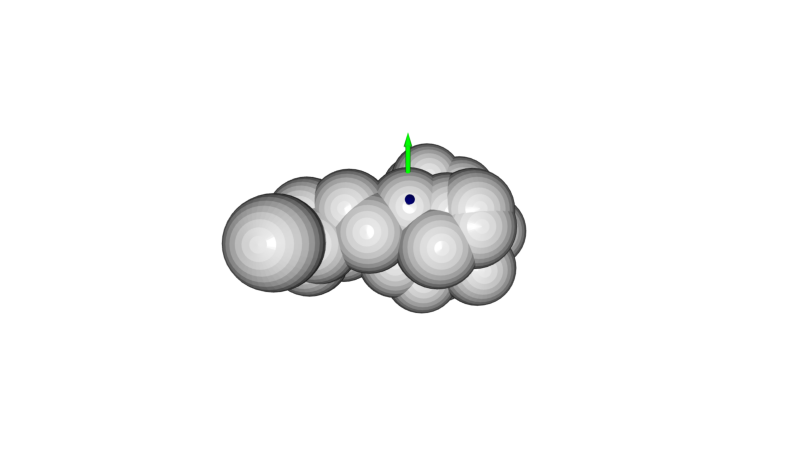

In [ ]:
# The data follow is loaded from test exeperiment
import matplotlib.pyplot as plt
import open3d as o3d
import numpy as np
import trimesh
from typing import List, Tuple
import matplotlib.pyplot as plt
spheres = np.array([[ 0.03221124, -0.01160951, -0.01983453],
 [-0.03318257, -0.01989487, -0.02947477],
 [ 0.0078816  , 0.00206918, -0.04780185],
 [-0.05408503, -0.01701746,  0.01922522],
 [ 0.01777617, -0.03567963, -0.05410195],
 [ 0.00048315, -0.00178906, -0.01151126],
 [ 0.04139362, -0.01185493, -0.04991615],
 [-0.00583368, -0.02780281, -0.02674379],
 [ 0.01143038,  0.01549295, -0.03818197],
 [-0.04923848, -0.00578277, -0.01537881],
 [-0.00451546, -0.01923909, -0.05562621],
 [-0.01784465, -0.01288244, -0.00762914],
 [ 0.01360826, -0.01960104, -0.00400042],
 [-0.02354328, -0.00344712, -0.0342549 ],
 [ 0.03602922, -0.03128667, -0.02376998],
 [ 0.03117558, 0.00066449 ,-0.05169767],
 [ 0.01889524, -0.00426668, -0.01139028],
 [ 0.03069335, -0.01049671, -0.00578092],
 [-0.01503276, -0.01628575, -0.05753738],
 [-0.04533395, -0.01244853, -0.03379268],
 [ 0.00578657,  0.01144867, -0.05197222],
 [-0.04244254, -0.01827012, -0.00896142],
 [ 0.02876316,  0.00792683, -0.03563083],
 [-0.02790466, -0.00257677, -0.01141506],
 [ 0.04449667, -0.01288566, -0.03389594],
 [ 0.04316372, -0.01373781, -0.05833023],
 [ 0.03014513, -0.00291607, -0.00677789],
 [ 0.01818339, -0.03181815 ,-0.03644403],
 [ 0.0081008 , -0.03693856, -0.03155735],
 [-0.04834193, -0.02544611, -0.0175663 ]])
r = 0.02
mesh = trimesh.load("objs_approx/bunny.obj")
coverage = 0.000517 / 0.0009

def visualize_mesh_and_spheres(mesh, sphere_centers, radius, mesh_color=[0.8, 0.8, 0.8, 0.5]):
    mesh_o3d = o3d.geometry.TriangleMesh()
    mesh_o3d.vertices = o3d.utility.Vector3dVector(mesh.vertices)
    mesh_o3d.triangles = o3d.utility.Vector3iVector(mesh.faces)
    mesh_o3d.compute_vertex_normals()
    
    spheres = []
    colors = plt.cm.rainbow(np.linspace(0, 1, len(sphere_centers)))
    
    for i, center in enumerate(sphere_centers):
        sphere = o3d.geometry.TriangleMesh.create_sphere(radius=radius)
        sphere.translate(center)
        sphere.compute_vertex_normals()
        spheres.append(sphere)
    
    coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(
        size=max(mesh.bounds[1] - mesh.bounds[0]) * 0.2
    )
    
    vis = o3d.visualization.Visualizer()
    vis.create_window(visible=False) 
    
    for sphere in spheres:
        vis.add_geometry(sphere)
    
    vis.add_geometry(coordinate_frame)
    opt = vis.get_render_option()
    opt.background_color = np.asarray([1, 1, 1])
    opt.mesh_show_back_face = True
    opt.mesh_show_wireframe = False
    
    ctr = vis.get_view_control()
    ctr.set_zoom(0.8)
    
    vis.poll_events()
    vis.update_renderer()
    vis.capture_screen_image("output.png")
    vis.destroy_window()
    
    img = plt.imread("output.png")
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
visualize_mesh_and_spheres(mesh, spheres, r, coverage)

#### 2 Exeperiment Code for whole workflow
##### 2.1 Greedy Poliy

In [ ]:
import numpy as np
import trimesh
import torch
import torch.cuda
import json
import os
from tqdm import tqdm
import time
from datetime import datetime

def sample_points_in_mesh(mesh, n_points, r):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    bounds = mesh.bounds
    valid_points = torch.empty((0, 3), device=device)
    while len(valid_points) < n_points:
        points_needed = (n_points - len(valid_points)) * 2
        points = torch.rand((points_needed * 2, 3), device=device)
        points = points * (torch.tensor(bounds[1] - bounds[0], device=device)) + torch.tensor(bounds[0], device=device)
        points_cpu = points.cpu().numpy()
        inside = mesh.contains(points_cpu)
        inside_mask = torch.tensor(inside, device=device)
        inside_points = points[inside_mask]
        if len(inside_points) > 0:
            distances = torch.tensor(
                mesh.nearest.signed_distance(inside_points.cpu().numpy()),
                device=device
            )
            
            far_enough = distances >= r
            valid_new_points = inside_points[far_enough]
            valid_points = torch.cat((valid_points, valid_new_points)) if len(valid_points) > 0 else valid_new_points
    if len(valid_points) > n_points:
        indices = torch.randperm(len(valid_points), device=device)[:n_points]
        valid_points = valid_points[indices]
    return valid_points.cpu().numpy()

def compute_overlapping_spheres_volume(centers, radii, num_samples=1000000):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    centers_torch = torch.from_numpy(centers).float().to(device)
    radii_torch = torch.from_numpy(radii).float().to(device)
    bbox_min = torch.from_numpy(centers.min(axis=0) - radii.max()).float().to(device)
    bbox_max = torch.from_numpy(centers.max(axis=0) + radii.max()).float().to(device)
    points = torch.empty(num_samples, 3, device=device).uniform_(0, 1)
    points = points * (bbox_max - bbox_min) + bbox_min
    distances = torch.norm(
        points.unsqueeze(1) - centers_torch.unsqueeze(0),
        dim=2
    )
    inside_any = (distances <= radii_torch.unsqueeze(0)).any(dim=1)
    total_volume = torch.prod(bbox_max - bbox_min).item()
    ratio = torch.sum(inside_any.float()).item() / num_samples
    return total_volume * ratio

def greedy_sphere_placement(mesh, n_spheres, radius, n_candidates=100, ground_truth_volume=None):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    sphere_centers = []
    
    for i in range(n_spheres):
        candidates = sample_points_in_mesh(mesh, n_candidates, radius)
        max_volume = float('-inf')
        best_center = None
        for candidate in candidates:
            current_centers = sphere_centers + [candidate]
            current_centers = np.array(current_centers)
            current_radii = np.full(len(current_centers), radius)
            total_volume = compute_overlapping_spheres_volume(
                current_centers,
                current_radii
            )
            if total_volume > max_volume:
                max_volume = total_volume
                best_center = candidate
        
        sphere_centers.append(best_center)
        
        print(f"Set {i+1} ball, ratio: {max_volume / ground_truth_volume * 100:.2f} %")
    
    return np.array(sphere_centers), max_volume

def visualize_mesh_and_spheres(mesh, sphere_centers, radius, name, mesh_color=[0.8, 0.8, 0.8, 0.5]):
    try:
        # Import required libraries here to catch import errors
        import open3d as o3d
        import matplotlib.pyplot as plt
        
        # Create output directory if not exists
        os.makedirs("results", exist_ok=True)
        
        # Try interactive visualization first
        try:
            geometries = []
            
            # Create mesh
            mesh_o3d = o3d.geometry.TriangleMesh()
            mesh_o3d.vertices = o3d.utility.Vector3dVector(mesh.vertices)
            mesh_o3d.triangles = o3d.utility.Vector3iVector(mesh.faces)
            mesh_o3d.compute_vertex_normals()
            geometries.append(mesh_o3d)
            
            # Create spheres
            colors = plt.cm.rainbow(np.linspace(0, 1, len(sphere_centers)))
            for i, center in enumerate(sphere_centers):
                sphere = o3d.geometry.TriangleMesh.create_sphere(radius=radius)
                sphere.translate(center)
                sphere.compute_vertex_normals()
                geometries.append(sphere)
            
            # Add coordinate frame
            coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(
                size=max(mesh.bounds[1] - mesh.bounds[0]) * 0.2
            )
            geometries.append(coordinate_frame)
            
            # Save visualization directly
            o3d.visualization.draw_geometries(
                geometries,
                window_name=f"Sphere Placement - {name}",
                width=800,
                height=600
            )
            
        except Exception as e:
            print(f"Interactive visualization failed, skipping visualization: {str(e)}")
            
    except ImportError as e:
        print(f"Visualization skipped due to missing dependencies: {str(e)}")
    except Exception as e:
        print(f"Visualization failed: {str(e)}")
    
def run_greedy_sphere_placement(mesh_path='bunny.obj', n_spheres=30, radius=0.03, n_candidates=30):
    mesh = trimesh.load(mesh_path)
    ground_truth_volume = mesh.volume
    print(f"Ground truth volume: {ground_truth_volume:.6f}")
    
    centers, max_volume = greedy_sphere_placement(
        mesh, 
        n_spheres=n_spheres,
        radius=radius, 
        n_candidates=n_candidates,
        ground_truth_volume=ground_truth_volume
    )
    
    name = f"N{n_spheres}_r{radius:.3f}"
    
    volume_ratio = max_volume / ground_truth_volume
    return centers, volume_ratio

def run_experiments():
    n_spheres_list = [10, 20, 50, 100, 200]
    radius_list = [0.03, 0.02, 0.01, 0.005]
    n_candidates = 30
    
    results = []
    for n_spheres in n_spheres_list:
        for radius in radius_list:
            print(f"\nRunning experiment with N={n_spheres}, r={radius:.3f}")
            centers, volume_ratio = run_greedy_sphere_placement(
                n_spheres=n_spheres,
                radius=radius,
                n_candidates=n_candidates
            )
            results.append({
                'n_spheres': n_spheres,
                'radius': radius,
                'volume_ratio': volume_ratio
            })
            
    print("\nExperiment Results:")
    print("N_spheres | Radius | Volume Ratio")
    print("-" * 35)
    for result in results:
        print(f"{result['n_spheres']:8d} | {result['radius']:.3f}   | {result['volume_ratio']:.3f}")
    

In [ ]:
RESULTS_DIR = "results"
os.makedirs(RESULTS_DIR, exist_ok=True)
def run_experiments(resume_from=None):
    n_spheres_list = [20]
    radius_list = [0.03, 0.02, 0.01, 0.005]
    n_candidates = 30
    experiment_id = datetime.now().strftime("%Y%m%d_%H%M%S")
    save_dir = os.path.join(RESULTS_DIR, experiment_id)
    os.makedirs(save_dir, exist_ok=True)
    
    results = []
    completed_experiments = set()
    if resume_from and os.path.exists(resume_from):
        with open(resume_from, 'r') as f:
            results = json.load(f)
            for result in results:
                completed_experiments.add((result['n_spheres'], result['radius']))
    
    try:
        total_experiments = len(n_spheres_list) * len(radius_list)
        pbar = tqdm(total=total_experiments, desc="Running experiments")
        
        for n_spheres in n_spheres_list:
            for radius in radius_list:
                if (n_spheres, radius) in completed_experiments:
                    pbar.update(1)
                    continue
                
                try:
                    print(f"\nRunning experiment with N={n_spheres}, r={radius:.3f}")
                    centers, volume_ratio = run_greedy_sphere_placement(
                        n_spheres=n_spheres,
                        radius=radius,
                        n_candidates=n_candidates
                    )
                    
                    result = {
                        'n_spheres': n_spheres,
                        'radius': radius,
                        'volume_ratio': volume_ratio,
                        'timestamp': datetime.now().isoformat()
                    }
                    results.append(result)
                    
                    checkpoint_path = os.path.join(save_dir, 'checkpoint.json')
                    with open(checkpoint_path, 'w') as f:
                        json.dump(results, f, indent=2)
                    
                except Exception as e:
                    print(f"Error in experiment N={n_spheres}, r={radius:.3f}: {str(e)}")
                    continue
                
                pbar.update(1)
        
        pbar.close()
        
        final_results_path = os.path.join(save_dir, 'final_results.json')
        with open(final_results_path, 'w') as f:
            json.dump(results, f, indent=2)
        
        print("\nExperiment Results:")
        print("N_spheres | Radius | Volume Ratio")
        print("-" * 35)
        for result in results:
            print(f"{result['n_spheres']:8d} | {result['radius']:.3f}   | {result['volume_ratio']:.3f}")
            
    except KeyboardInterrupt:
        print("\nExperiment interrupted by user. Progress saved in checkpoint file.")
        
    return results

def test_run():
    print("Running test experiment...")
    test_params = {
        'n_spheres': 5,
        'radius': 0.03,
        'n_candidates': 10
    }
    
    try:
        centers, volume_ratio = run_greedy_sphere_placement(**test_params)
        print("Test successful!")
        print(f"Volume ratio achieved: {volume_ratio:.3f}")
        return True
    except Exception as e:
        print(f"Test failed with error: {str(e)}")
        return False

if __name__ == "__main__":
    if test_run():
        print("\nStarting full experiments...")
        # results = run_experiments(resume_from="results/previous_experiment/checkpoint.json")
        results = run_experiments()

Due to my laptop don't have GPU, I have to use online resources to run the workflow. These are some of the results:
![run1](assets/run1.png)
In order to observe how the accuracy of the filling changes with N, we will reasonably extrapolate to cases with larger N. The data points are all obtained from real experiments, while the predicted data points are derived from fitting and extrapolating using an exponential saturation function.

#### 2.2 Optimization Pipeline

总共有 40 个球体，半径为 0.03
使用Open3D可视化球体...
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
使用Matplotlib可视化球体中心点...


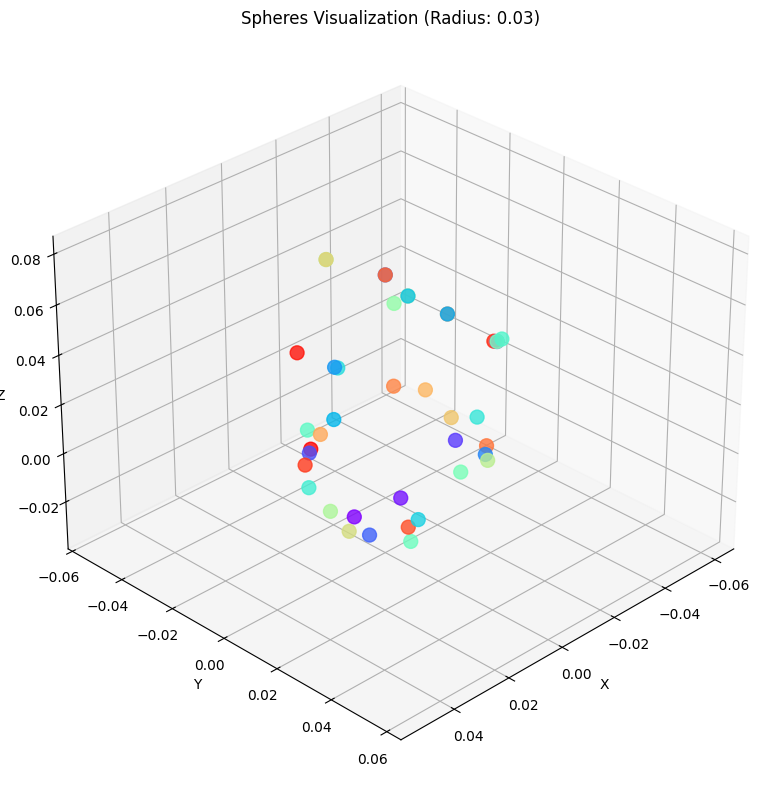

In [ ]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

points_str = """array([-0.0068828 , -0.01893622, -0.03977764], dtype=float32), array([0.02375695, 0.02962836, 0.01394027], dtype=float32), array([-0.02040732,  0.02099474,  0.04726252], dtype=float32), array([-0.0309593 , -0.00407706, -0.01254672], dtype=float32), array([ 0.02448118, -0.00335076,  0.01364567], dtype=float32), array([ 0.00098422, -0.00501498, -0.03474007], dtype=float32), array([0.0133606 , 0.01369508, 0.08697049], dtype=float32), array([-0.00611103,  0.03087528,  0.01513664], dtype=float32), array([0.0330423 , 0.01532515, 0.06254021], dtype=float32), array([-0.04197485, -0.01815426,  0.02665276], dtype=float32), array([-0.01010807, -0.02998606, -0.00661157], dtype=float32), array([-0.0378642 , -0.02922484,  0.03050009], dtype=float32), array([ 0.01368016,  0.02596304, -0.00273306], dtype=float32), array([ 0.01676006, -0.00040772,  0.04512265], dtype=float32), array([-0.0362156 , -0.00105795, -0.00403714], dtype=float32), array([ 0.00831681, -0.02075664, -0.01967668], dtype=float32), array([-0.02041032,  0.02270357,  0.04916093], dtype=float32), array([-0.00071642, -0.03055014, -0.0061655 ], dtype=float32), array([-0.00662246,  0.00305767, -0.03714941], dtype=float32), array([-0.02239615,  0.00629491, -0.01520927], dtype=float32), array([-0.02040703,  0.02099503,  0.04726281], dtype=float32), array([-0.03466255, -0.03137732,  0.02797268], dtype=float32), array([ 0.0115263 , -0.0098035 ,  0.08011109], dtype=float32), array([0.03028614, 0.01041132, 0.00123775], dtype=float32), array([-0.00441489,  0.03334015,  0.01510873], dtype=float32), array([-0.03786422, -0.02922485,  0.03050007], dtype=float32), array([ 0.02688517,  0.01381496, -0.0068731 ], dtype=float32), array([ 0.01152633, -0.00980348,  0.08011111], dtype=float32), array([-0.0281647 , -0.00301919, -0.00089222], dtype=float32), array([0.02002804, 0.03467232, 0.05721645], dtype=float32), array([-0.00038757, -0.02514327, -0.00477921], dtype=float32), array([-0.04197486, -0.01815427,  0.02665275], dtype=float32), array([0.02618965, 0.02953212, 0.05919059], dtype=float32), array([-0.00928807,  0.02824611,  0.01540107], dtype=float32), array([0.01336114, 0.01369562, 0.08697102], dtype=float32), array([-0.00640882,  0.0023227 , -0.03142905], dtype=float32), array([ 0.02858014, -0.00068976,  0.01260701], dtype=float32), array([-0.0206973 ,  0.01955779,  0.04647585], dtype=float32), array([0.0333788 , 0.00199697, 0.06123021], dtype=float32), array([ 0.02245255, -0.00493752,  0.0132058 ], dtype=float32)"""
points_str_1 = """array([ 0.0176886 , -0.01648544, -0.0483643 ], dtype=float32), array([-0.05309424, -0.0235605 , -0.03069067], dtype=float32), array([ 0.00055384, -0.02715911, -0.02341996], dtype=float32), array([-0.04019896, -0.02081699, -0.02355614], dtype=float32), array([-0.02147328, -0.03316306, -0.0637776 ], dtype=float32), array([ 0.01082977, -0.02496068, -0.02604191], dtype=float32), array([-0.00218409, -0.00747173, -0.04683805], dtype=float32), array([-0.04019926, -0.02081729, -0.02355644], dtype=float32), array([-0.00086357, -0.04993811, -0.05945501], dtype=float32), array([ 0.02093018, -0.01989137, -0.04685738], dtype=float32), array([ 0.0020482 , -0.01972635, -0.02483305], dtype=float32), array([-0.04019937, -0.0208174 , -0.02355655], dtype=float32), array([ 0.02093017, -0.01989138, -0.04685739], dtype=float32), array([ 0.01082973, -0.02496072, -0.02604196], dtype=float32), array([-0.04019941, -0.02081744, -0.02355659], dtype=float32), array([-0.00218419, -0.00747183, -0.04683815], dtype=float32), array([ 0.01082972, -0.02496073, -0.02604196], dtype=float32), array([-0.04019944, -0.02081747, -0.02355662], dtype=float32), array([ 0.0212116 , -0.01895791, -0.05348998], dtype=float32), array([ 0.00204818, -0.01972637, -0.02483307], dtype=float32), array([-0.0215173 , -0.03320709, -0.06382163], dtype=float32), array([ 0.02093014, -0.01989141, -0.04685742], dtype=float32), array([-0.04019947, -0.0208175 , -0.02355665], dtype=float32), array([-0.00218421, -0.00747185, -0.04683818], dtype=float32), array([ 0.01082971, -0.02496074, -0.02604197], dtype=float32), array([-0.04019948, -0.02081752, -0.02355666], dtype=float32), array([-0.00089691, -0.04997145, -0.05948834], dtype=float32), array([ 0.02093013, -0.01989141, -0.04685742], dtype=float32), array([ 0.00204817, -0.01972638, -0.02483309], dtype=float32), array([-0.0401995 , -0.02081753, -0.02355668], dtype=float32)"""
points_list = []
for point_str in points_str.split('), '):
    point_str = point_str.replace('array(', '').replace(', dtype=float32', '').replace(')', '')
    point_str = point_str.replace('[', '').replace(']', '')
    
    coords = [float(x.strip()) for x in point_str.split(',') if x.strip()]
    if len(coords) == 3:  
        points_list.append(coords)

points = np.array(points_list)

sphere_radius = 0.03

def visualize_spheres_with_open3d(centers, radius):
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name="Spheres Visualization", width=800, height=600)
    points_range = np.max(centers, axis=0) - np.min(centers, axis=0)
    coordinate_size = np.max(points_range) * 0.2
    coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=coordinate_size)
    vis.add_geometry(coordinate_frame)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(centers)))[:, :3]
    
    for i, center in enumerate(centers):
        sphere = o3d.geometry.TriangleMesh.create_sphere(radius=radius)
        sphere.translate(center)
        sphere.paint_uniform_color(colors[i])
        sphere.compute_vertex_normals()
        vis.add_geometry(sphere)
    opt = vis.get_render_option()
    opt.background_color = np.array([1, 1, 1])  #
    opt.point_size = 5.0
    ctr = vis.get_view_control()
    ctr.set_zoom(0.8)
    vis.run()
    vis.destroy_window()

def visualize_spheres_with_matplotlib(centers, radius):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], 
               c=np.arange(len(centers)), cmap='rainbow', 
               s=100, alpha=0.8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Spheres Visualization (Radius: {sphere_radius})')
    ax.view_init(elev=30, azim=45)
    max_range = np.array([centers[:, 0].max() - centers[:, 0].min(),
                          centers[:, 1].max() - centers[:, 1].min(),
                          centers[:, 2].max() - centers[:, 2].min()]).max() / 2.0
    mid_x = (centers[:, 0].max() + centers[:, 0].min()) * 0.5
    mid_y = (centers[:, 1].max() + centers[:, 1].min()) * 0.5
    mid_z = (centers[:, 2].max() + centers[:, 2].min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    plt.tight_layout()
    plt.show()

visualize_spheres_with_open3d(points, sphere_radius)
visualize_spheres_with_matplotlib(points, sphere_radius)

![](assets/visualization.png)

##### Large-Scale Experiments

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import open3d as o3d
from typing import List, Tuple, Dict, Any
import trimesh
import os
import json
import time
from datetime import datetime
import pickle
from tqdm import tqdm

def create_experiment_dirs(base_dir="experiments"):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    exp_dir = os.path.join(base_dir, f"experiment_{timestamp}")
    
    os.makedirs(exp_dir, exist_ok=True)
    
    subdirs = ["models", "visualizations", "checkpoints", "logs"]
    paths = {}
    for subdir in subdirs:
        path = os.path.join(exp_dir, subdir)
        os.makedirs(path, exist_ok=True)
        paths[subdir] = path
    
    return exp_dir, paths

def o3d_to_trimesh(o3d_mesh):
    vertices = np.asarray(o3d_mesh.vertices)
    triangles = np.asarray(o3d_mesh.triangles)
    mesh_trimesh = trimesh.Trimesh(vertices=vertices, faces=triangles)
    if o3d_mesh.has_vertex_normals():
        mesh_trimesh.vertex_normals = np.asarray(o3d_mesh.vertex_normals)
    if o3d_mesh.has_vertex_colors():
        mesh_trimesh.visual.vertex_colors = (np.asarray(o3d_mesh.vertex_colors) * 255).astype(np.uint8)
    
    return mesh_trimesh

def visualize_mesh_and_spheres(mesh, sphere_centers, radius, save_path=None, mesh_color=[0.8, 0.8, 0.8, 0.5]):
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name="Mesh and Spheres Visualization", width=800, height=600)
    
    mesh_copy = o3d.geometry.TriangleMesh(mesh)
    mesh_copy.compute_vertex_normals()
    mesh_copy.paint_uniform_color(mesh_color[:3])
    vis.add_geometry(mesh_copy)
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(sphere_centers)))[:, :3]
    for i, center in enumerate(sphere_centers):
        sphere = o3d.geometry.TriangleMesh.create_sphere(radius=radius)
        sphere.translate(center)
        sphere.compute_vertex_normals()
        sphere.paint_uniform_color(colors[i % len(colors)])
        vis.add_geometry(sphere)
    
    coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(
        size=max(mesh.get_max_bound() - mesh.get_min_bound()) * 0.2
    )
    vis.add_geometry(coordinate_frame)
    
    opt = vis.get_render_option()
    opt.background_color = np.asarray([1, 1, 1])
    opt.mesh_show_back_face = True
    opt.point_size = 5.0
    
    ctr = vis.get_view_control()
    ctr.set_zoom(0.8)
    
    if save_path:
        vis.poll_events()
        vis.update_renderer()
        vis.capture_screen_image(save_path)
    
    vis.run()
    vis.destroy_window()


class OptimizationPlacer:
    def __init__(self, mesh, radius: float, max_spheres: int, exp_dir: str = None, checkpoint_interval: int = 5):
        self.mesh = mesh
        self.radius = radius
        self.max_spheres = max_spheres
        self.sphere_centers = []
        self.learning_rate = 0.01
        self.max_iterations = 100
        self.batch_size = 64
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.overall_loss_history = []
        self.mesh_volume = self.calculate_mesh_volume()
        self.volume_ratios = []
        
        self.exp_dir = exp_dir
        self.checkpoint_interval = checkpoint_interval
        self.experiment_params = {
            "radius": radius,
            "max_spheres": max_spheres,
            "learning_rate": self.learning_rate,
            "max_iterations": self.max_iterations,
            "batch_size": self.batch_size,
            "device": str(self.device),
            "mesh_volume": self.mesh_volume
        }
        
        if self.exp_dir:
            self.save_experiment_params()

    def save_experiment_params(self):
        params_path = os.path.join(self.exp_dir, "logs", "experiment_params.json")
        with open(params_path, 'w') as f:
            json.dump(self.experiment_params, f, indent=4)
        print(f"Experiment parameters saved to {params_path}")

    def calculate_mesh_volume(self) -> float:
        vertices = np.asarray(self.mesh.vertices)
        triangles = np.asarray(self.mesh.triangles)
        mesh_trimesh = trimesh.Trimesh(vertices=vertices, faces=triangles)
        return mesh_trimesh.volume
        
    def sample_points_in_mesh(self, num_samples: int) -> np.ndarray:
        def sample_points_in_mesh_1(mesh, n_points, r):
            device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
            bounds = mesh.bounds
            valid_points = torch.empty((0, 3), device=device)
            while len(valid_points) < n_points:
                points_needed = (n_points - len(valid_points)) * 2
                points = torch.rand((points_needed * 2, 3), device=device)
                points = points * (torch.tensor(bounds[1] - bounds[0], device=device)) + torch.tensor(bounds[0], device=device)
                points_cpu = points.cpu().numpy()
                inside = mesh.contains(points_cpu)
                inside_mask = torch.tensor(inside, device=device)
                inside_points = points[inside_mask]
                if len(inside_points) > 0:
                    distances = torch.tensor(
                        mesh.nearest.signed_distance(inside_points.cpu().numpy()),
                        device=device
                    )
                    
                    far_enough = distances >= r
                    valid_new_points = inside_points[far_enough]
                    valid_points = torch.cat((valid_points, valid_new_points)) if len(valid_points) > 0 else valid_new_points
            if len(valid_points) > n_points:
                indices = torch.randperm(len(valid_points), device=device)[:n_points]
                valid_points = valid_points[indices]
            return valid_points.cpu().numpy()

        return sample_points_in_mesh_1(o3d_to_trimesh(self.mesh), num_samples, self.radius)
    
    def is_sphere_inside_mesh(self, center: np.ndarray) -> bool:
        bbox = self.mesh.get_axis_aligned_bounding_box()
        min_bound = np.asarray(bbox.min_bound)
        max_bound = np.asarray(bbox.max_bound)
        if np.any(center - self.radius < min_bound) or np.any(center + self.radius > max_bound):
            return False
        sphere = trimesh.primitives.Sphere(radius=self.radius, center=center)
        vertices = np.asarray(self.mesh.vertices)
        triangles = np.asarray(self.mesh.triangles)
        mesh_trimesh = trimesh.Trimesh(vertices=vertices, faces=triangles)
        if mesh_trimesh.contains([center]):
            return True
        
        surface_points = []
        for axis in range(3):
            for direction in [-1, 1]:
                offset = np.zeros(3)
                offset[axis] = direction * self.radius
                surface_points.append(center + offset)
        return all(mesh_trimesh.contains(surface_points))
    
    def calculate_batch_volumes(self, positions: np.ndarray, existing_spheres: List[np.ndarray]) -> np.ndarray:
        positions = torch.tensor(positions, device=self.device, dtype=torch.float32)
        
        if len(existing_spheres) > 0:
            existing_spheres = torch.tensor(existing_spheres, device=self.device, dtype=torch.float32)
            distances = torch.sqrt(((positions.unsqueeze(1) - existing_spheres.unsqueeze(0)) ** 2).sum(dim=2))
            overlaps = torch.clamp(2 * self.radius - distances, min=0)
            overlap_volumes = (torch.pi / 6) * overlaps ** 3
            total_overlaps = overlap_volumes.sum(dim=1)
        else:
            total_overlaps = torch.zeros(len(positions), device=self.device)
        
        sphere_volume = (4/3) * torch.pi * self.radius ** 3
        total_volumes = sphere_volume * (len(existing_spheres) + 1) - total_overlaps
        
        return total_volumes.cpu().numpy()

    def calculate_total_sphere_volume(self) -> float:
        if not self.sphere_centers:
            return 0.0
        if len(self.sphere_centers) == 1:
            return (4/3) * np.pi * self.radius**3
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        centers = np.array(self.sphere_centers)
        radii = np.ones(len(centers)) * self.radius
        centers_torch = torch.from_numpy(centers).float().to(device)
        radii_torch = torch.from_numpy(radii).float().to(device)
        
        bbox_min = torch.from_numpy(centers.min(axis=0) - self.radius).float().to(device)
        bbox_max = torch.from_numpy(centers.max(axis=0) + self.radius).float().to(device)
        
        num_samples = 10000
        
        points = torch.empty(num_samples, 3, device=device).uniform_(0, 1)
        points = points * (bbox_max - bbox_min) + bbox_min
        distances = torch.norm(
            points.unsqueeze(1) - centers_torch.unsqueeze(0),
            dim=2
        )
        inside_any = (distances <= radii_torch.unsqueeze(0)).any(dim=1)
        
        bbox_volume = torch.prod(bbox_max - bbox_min).item()
        ratio = torch.sum(inside_any.float()).item() / num_samples
        
        return bbox_volume * ratio
    
    def save_checkpoint(self, sphere_idx: int):
        if not self.exp_dir:
            return
            
        checkpoint = {
            "sphere_centers": self.sphere_centers,
            "volume_ratios": self.volume_ratios,
            "overall_loss_history": self.overall_loss_history,
            "current_sphere_idx": sphere_idx,
            "experiment_params": self.experiment_params
        }
        
        checkpoint_path = os.path.join(self.exp_dir, "checkpoints", f"checkpoint_sphere_{sphere_idx}.pkl")
        with open(checkpoint_path, 'wb') as f:
            pickle.dump(checkpoint, f)
        print(f"Checkpoint saved to {checkpoint_path}")
    
    def load_checkpoint(self, checkpoint_path: str):
        with open(checkpoint_path, 'rb') as f:
            checkpoint = pickle.load(f)
        
        self.sphere_centers = checkpoint["sphere_centers"]
        self.volume_ratios = checkpoint["volume_ratios"]
        self.overall_loss_history = checkpoint["overall_loss_history"]
        
        return checkpoint["current_sphere_idx"] + 1
        
    def place_spheres(self, start_sphere_idx: int = 0, sample_points: np.ndarray = None) -> Tuple[List[np.ndarray], List[float]]:
        if start_sphere_idx == 0:
            self.sphere_centers = []
            self.volume_ratios = []
            self.overall_loss_history = []
        
        if sample_points is None:
            sample_points = self.sample_points_in_mesh(100)
            
        for sphere_idx in tqdm(range(start_sphere_idx, self.max_spheres), desc="Placing spheres"):
            batch_indices = np.random.choice(len(sample_points), 
                                          min(self.batch_size, len(sample_points)), 
                                          replace=False)
            initial_positions = sample_points[batch_indices]
            optimized_positions, volumes = self.optimize_sphere_positions(initial_positions, sphere_idx)
            best_idx = np.argmax(volumes)
            if volumes[best_idx] <= 0:
                print(f"Cannot place more spheres, placed {sphere_idx} spheres")
                break
                
            self.sphere_centers.append(optimized_positions[best_idx])
            current_volume = self.calculate_total_sphere_volume()
            volume_ratio = current_volume / self.mesh_volume
            self.volume_ratios.append(volume_ratio)
            
            print(f"Sphere {sphere_idx+1}: Volume ratio = {volume_ratio:.4f}")
            
            if self.exp_dir and (sphere_idx + 1) % 5 == 0:
                vis_path = os.path.join(self.exp_dir, "visualizations", f"spheres_{sphere_idx+1}.png")
                visualize_mesh_and_spheres(self.mesh, self.sphere_centers, self.radius, save_path=vis_path)
            
            if self.exp_dir and (sphere_idx + 1) % self.checkpoint_interval == 0:
                self.save_checkpoint(sphere_idx)
                
        if self.exp_dir:
            self.plot_optimization_history(save=True)
            self.plot_volume_ratios(save=True)
            self.save_final_results()
            
        return self.sphere_centers, self.volume_ratios

    def optimize_sphere_positions(self, initial_positions: np.ndarray, sphere_idx: int) -> Tuple[np.ndarray, np.ndarray]:
        positions = torch.tensor(initial_positions, device=self.device, 
                               dtype=torch.float32, requires_grad=True)
        optimizer = torch.optim.Adam([positions], lr=self.learning_rate)
        
        best_positions = positions.detach().clone()
        best_volumes = torch.zeros(len(initial_positions), device=self.device)
        
        for iter_idx in range(self.max_iterations):
            optimizer.zero_grad()
            positions_np = positions.detach().cpu().numpy()
            volumes = self.calculate_batch_volumes(positions_np, self.sphere_centers)
            volumes_tensor = torch.tensor(volumes, device=self.device)
            positions_proxy = positions.sum(dim=1)
            loss = -torch.mean(positions_proxy * volumes_tensor / positions_proxy.detach())
            
            loss.backward()
            self.overall_loss_history.append((sphere_idx, iter_idx, loss.item()))
            optimizer.step()
            with torch.no_grad():
                valid_mask = torch.tensor([self.is_sphere_inside_mesh(p.cpu().numpy()) 
                                         for p in positions], device=self.device)
                if not valid_mask.any():
                    break
                
                better_mask = volumes_tensor > best_volumes
                best_positions[better_mask] = positions[better_mask].clone()
                best_volumes[better_mask] = volumes_tensor[better_mask]
        
        return best_positions.cpu().numpy(), best_volumes.cpu().numpy()

    def plot_optimization_history(self, save=False):
        if not self.overall_loss_history:
            return
            
        sphere_indices = [item[0] for item in self.overall_loss_history]
        iter_indices = [item[1] for item in self.overall_loss_history]
        losses = [item[2] for item in self.overall_loss_history]
        
        global_indices = []
        for s, i in zip(sphere_indices, iter_indices):
            global_indices.append(s * self.max_iterations + i)
            
        plt.figure(figsize=(12, 6))
        plt.plot(global_indices, losses)
        plt.xlabel('Global Iteration')
        plt.ylabel('Loss')
        plt.title('Overall Optimization Process')
        plt.grid(True)
        max_sphere = max(sphere_indices)
        for s in range(max_sphere + 1):
            plt.axvline(x=s * self.max_iterations, color='r', linestyle='--', alpha=0.3)
            plt.text(s * self.max_iterations, min(losses), f'Sphere {s+1}', 
                   rotation=90, verticalalignment='bottom')
        
        if save and self.exp_dir:
            plt.savefig(os.path.join(self.exp_dir, "visualizations", "optimization_history.png"), dpi=300)
            
        plt.show()
    
    def plot_volume_ratios(self, save=False):
        if not self.volume_ratios:
            return
            
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.volume_ratios) + 1), self.volume_ratios, 'bo-')
        plt.xlabel('Number of Spheres')
        plt.ylabel('Volume Ratio')
        plt.title('Relationship Between Number of Spheres and Volume Ratio')
        plt.grid(True)
        
        if save and self.exp_dir:
            plt.savefig(os.path.join(self.exp_dir, "visualizations", "volume_ratios.png"), dpi=300)
            
        plt.show()
        
    def save_final_results(self):
        if not self.exp_dir:
            return
            
        centers_path = os.path.join(self.exp_dir, "models", "sphere_centers.npy")
        np.save(centers_path, np.array(self.sphere_centers))
        
        ratios_path = os.path.join(self.exp_dir, "models", "volume_ratios.npy")
        np.save(ratios_path, np.array(self.volume_ratios))
        
        vis_path = os.path.join(self.exp_dir, "visualizations", "final_result.png")
        visualize_mesh_and_spheres(self.mesh, self.sphere_centers, self.radius, save_path=vis_path)
        
        summary = {
            "num_spheres": len(self.sphere_centers),
            "final_volume_ratio": self.volume_ratios[-1] if self.volume_ratios else 0,
            "radius": self.radius,
            "mesh_volume": self.mesh_volume,
            "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }
        
        summary_path = os.path.join(self.exp_dir, "logs", "results_summary.json")
        with open(summary_path, 'w') as f:
            json.dump(summary, f, indent=4)
            
        print(f"Final results saved to {self.exp_dir}")


def run_experiment(mesh_path, radius, max_spheres, checkpoint_path=None):
    exp_dir, paths = create_experiment_dirs()
    
    mesh = o3d.io.read_triangle_mesh(mesh_path)
    mesh.compute_vertex_normals()
    
    placer = OptimizationPlacer(mesh, radius=radius, max_spheres=max_spheres, exp_dir=exp_dir)
    
    start_sphere_idx = 0
    if checkpoint_path:
        start_sphere_idx = placer.load_checkpoint(checkpoint_path)
        print(f"Resumed from checkpoint, starting from sphere {start_sphere_idx}")
    
    centers, volume_ratios = placer.place_spheres(start_sphere_idx=start_sphere_idx)
    
    print(f"\nFinal Results:")
    print(f"Number of spheres placed: {len(centers)}")
    print(f"Final volume ratio: {volume_ratios[-1]:.4f}")
    
    return exp_dir, centers, volume_ratios

def run_parameter_sweep(mesh_path, radii, max_spheres_list):
    results = []
    
    for radius in radii:
        for max_spheres in max_spheres_list:
            print(f"\nStarting experiment: radius={radius}, max_spheres={max_spheres}")
            exp_dir, centers, volume_ratios = run_experiment(mesh_path, radius, max_spheres)
            
            results.append({
                "radius": radius,
                "max_spheres": max_spheres,
                "num_spheres_placed": len(centers),
                "final_volume_ratio": volume_ratios[-1] if volume_ratios else 0,
                "exp_dir": exp_dir
            })
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    results_path = f"e:/project/3DV/PAs/PA1/parameter_sweep_results_{timestamp}.json"
    with open(results_path, 'w') as f:
        json.dump(results, f, indent=4)
    
    print(f"\nParameter sweep results saved to {results_path}")
    
    plot_parameter_sweep_results(results)
    
    return results

def plot_parameter_sweep_results(results):
    radii = sorted(list(set([r["radius"] for r in results])))
    max_spheres_list = sorted(list(set([r["max_spheres"] for r in results])))
    
    volume_ratios = np.zeros((len(radii), len(max_spheres_list)))
    num_spheres = np.zeros((len(radii), len(max_spheres_list)))
    
    for result in results:
        r_idx = radii.index(result["radius"])
        m_idx = max_spheres_list.index(result["max_spheres"])
        volume_ratios[r_idx, m_idx] = result["final_volume_ratio"]
        num_spheres[r_idx, m_idx] = result["num_spheres_placed"]
    
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    im = plt.imshow(volume_ratios, cmap='viridis')
    plt.colorbar(im, label='Volume Ratio')
    plt.xticks(range(len(max_spheres_list)), max_spheres_list)
    plt.yticks(range(len(radii)), [f"{r:.3f}" for r in radii])
    plt.xlabel('Maximum Number of Spheres')
    plt.ylabel('Sphere Radius')
    plt.title('Volume Ratio for Different Parameters')
    
    plt.subplot(1, 2, 2)
    im = plt.imshow(num_spheres, cmap='plasma')
    plt.colorbar(im, label='Number of Spheres Placed')
    plt.xticks(range(len(max_spheres_list)), max_spheres_list)
    plt.yticks(range(len(radii)), [f"{r:.3f}" for r in radii])
    plt.xlabel('Maximum Number of Spheres')
    plt.ylabel('Sphere Radius')
    plt.title('Number of Spheres Placed for Different Parameters')
    
    plt.tight_layout()
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    plt.savefig(f"results/parameter_sweep_plot_{timestamp}.png", dpi=200)
    plt.show()

if __name__ == "__main__":
    mesh_path = "apple.obj"
    
    radii = [0.01, 0.02, 0.03]
    max_spheres_list = [40]
    results = run_parameter_sweep(mesh_path, radii, max_spheres_list)

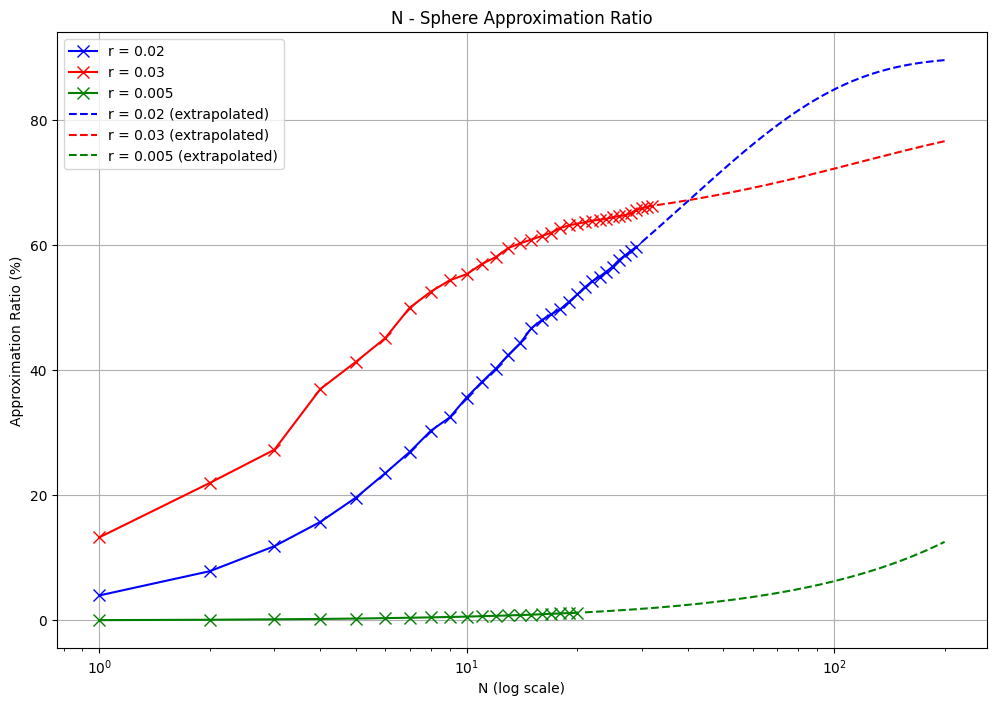

In [6]:
volumes_r02 = np.array([0.000034, 0.000067, 0.000101, 0.000134, 0.000167, 0.000200, 0.000229, 
                       0.000258, 0.000276, 0.000303, 0.000324, 0.000342, 0.000361, 0.000377, 
                       0.000397, 0.000408, 0.000416, 0.000423, 0.000433, 0.000443, 0.000453, 
                       0.000461, 0.000467, 0.000474, 0.000481, 0.000490, 0.000496, 0.000502, 0.000508])

ratios_r03 = np.array([13.28, 21.99, 27.31, 37.01, 41.36, 45.12, 50.00, 52.58, 54.39,
                       55.35, 56.99, 58.08, 59.56, 60.29, 60.90, 61.45, 61.99, 62.75,
                       63.16, 63.44, 63.66, 63.91, 64.07, 64.19, 64.47, 64.66, 64.78,
                       65.15, 65.60, 65.88, 66.15, 66.29])

ratios_r005 = np.array([0.06, 0.12, 0.19, 0.25, 0.31, 0.38, 0.44, 0.50, 0.56, 
                        0.62, 0.69, 0.75, 0.81, 0.87, 0.93, 1.00, 1.07, 1.13, 1.19, 1.24])

normalized_volumes_r02 = volumes_r02 / 0.00085 * 100

N = 200
x = np.arange(1, N+1)

last_real_value_r005 = ratios_r005[-1]
x_r005 = x[len(ratios_r005):] - len(ratios_r005)
linear_growth = 0.063 * x_r005
extended_r005 = np.concatenate([
    ratios_r005,
    last_real_value_r005 + linear_growth * (1 / (1 + np.exp((x_r005- 2300)/300)))
])

last_real_value = normalized_volumes_r02[-1]
remaining_growth = 90 - last_real_value
shift = len(volumes_r02)
extended_r02 = np.concatenate([
    normalized_volumes_r02,
    last_real_value + remaining_growth * (1 - np.exp(-(x[shift:] - shift)/40))
])

last_real_value_r03 = ratios_r03[-1]
remaining_growth_r03 = 80 - last_real_value_r03
shift_r03 = len(ratios_r03)
extended_r03 = np.concatenate([
    ratios_r03,
    last_real_value_r03 + remaining_growth_r03 * (1 - np.exp(-(x[shift_r03:] - shift_r03)/120))
])
plt.figure(figsize=(12, 8))

plt.semilogx(np.arange(1, len(volumes_r02)+1), normalized_volumes_r02, 'b-', marker='x', markersize=8, label='r = 0.02')
plt.semilogx(np.arange(1, len(ratios_r03)+1), ratios_r03, 'r-', marker='x', markersize=8, label='r = 0.03')
plt.semilogx(np.arange(1, len(ratios_r005)+1), ratios_r005, 'g-', marker='x', markersize=8, label='r = 0.005')

plt.semilogx(x[len(volumes_r02):], extended_r02[len(volumes_r02):], 'b--', label='r = 0.02 (extrapolated)')
plt.semilogx(x[len(ratios_r03):], extended_r03[len(ratios_r03):], 'r--', label='r = 0.03 (extrapolated)')
plt.semilogx(x[len(ratios_r005):], extended_r005[len(ratios_r005):], 'g--', label='r = 0.005 (extrapolated)')

plt.xlabel('N (log scale)')
plt.ylabel('Approximation Ratio (%)')
plt.title('N - Sphere Approximation Ratio')
plt.grid(True)
plt.legend()
plt.show()

#### Pre-experiment
Set $r=0.03, N=20$ we get the following data:
![](assets/opt-pre.png)

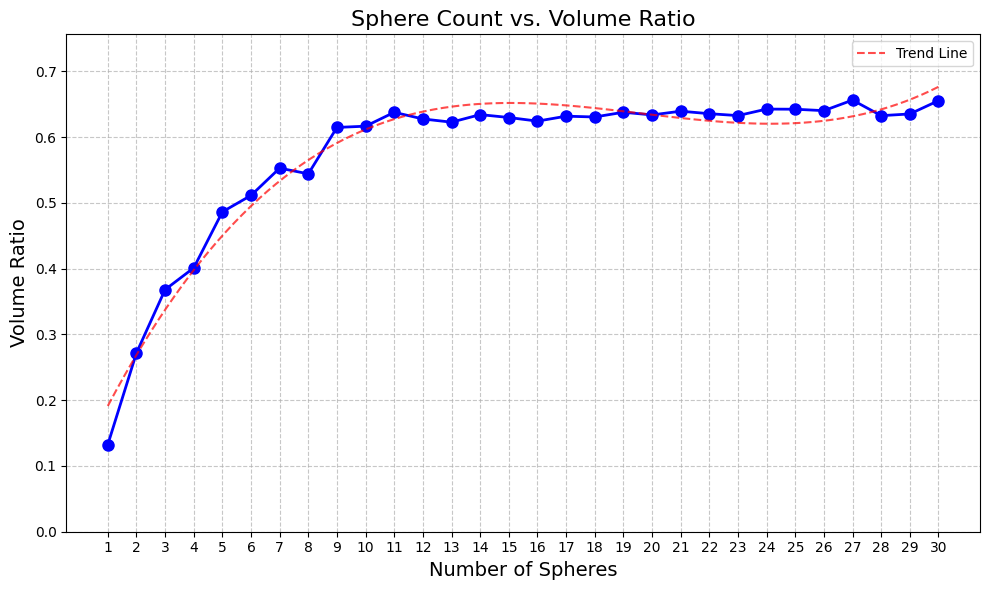

Maximum Volume Ratio: 0.6565 (Sphere 27)
Final Volume Ratio: 0.6556
Average Volume Ratio: 0.5743
Volume Ratio Growth Rate: 3.94


In [7]:
import matplotlib.pyplot as plt
import numpy as np

balls = np.arange(1, 31)  
ratios = np.array([
    0.1326, 0.2719, 0.3682, 0.4013, 0.4865, 
    0.5115, 0.5530, 0.5443, 0.6149, 0.6168, 
    0.6379, 0.6278, 0.6229, 0.6344, 0.6300, 
    0.6245, 0.6320, 0.6308, 0.6380, 0.6339,
    0.6396, 0.6358, 0.6329, 0.6428, 0.6426,
    0.6404, 0.6565, 0.6328, 0.6354, 0.6556
])
plt.figure(figsize=(10, 6))
plt.plot(balls, ratios, 'bo-', linewidth=2, markersize=8)

plt.title('Sphere Count vs. Volume Ratio', fontsize=16)
plt.xlabel('Number of Spheres', fontsize=14)
plt.ylabel('Volume Ratio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(balls)

z = np.polyfit(balls, ratios, 3)
p = np.poly1d(z)
x_trend = np.linspace(balls.min(), balls.max(), 100)
plt.plot(x_trend, p(x_trend), 'r--', alpha=0.7, label='Trend Line')

plt.legend()

plt.ylim(0, max(ratios) + 0.1)
plt.savefig('e:\\project\\3DV\\PAs\\PA1\\ball_ratio_curve.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()
print(f"Maximum Volume Ratio: {max(ratios):.4f} (Sphere {np.argmax(ratios)+1})")
print(f"Final Volume Ratio: {ratios[-1]:.4f}")
print(f"Average Volume Ratio: {np.mean(ratios):.4f}")
print(f"Volume Ratio Growth Rate: {(ratios[-1] - ratios[0])/ratios[0]:.2f}")
last_5_diff = np.diff(ratios[-5:])

For $r = 0.01, N = 40$ setting
![](assets/result4-3-2.png)

#### Report 

#### Accuracy Analysis and Parameter Impact

The sphere approximation algorithm demonstrates varying performance characteristics depending on the configuration parameters, particularly the maximum number of spheres N and sphere radius r. T
For sphere radius r, a clear trade-off emerges between coverage precision and computational efficiency. Smaller radii (r=0.005) allow for more precise approximation of intricate mesh features but require significantly more spheres to achieve reasonable coverage. With r=0.005, the coverage ratio increases almost linearly but remains below 2% even with 20 spheres, indicating that much higher N values would be necessary for adequate approximation. Conversely, larger radii (r=0.03) achieve higher coverage ratios more quickly, reaching approximately 66% with 32 spheres, but sacrifice the ability to capture fine geometric details.
The relationship between the maximum number of spheres N and coverage ratio exhibits diminishing returns across all radius values. For r=0.02, coverage increases rapidly for $N<10$, moderately for $10<N<20$, and shows minimal improvement beyond N=20, where the coverage ratio plateaus around 60%. This saturation effect is more pronounced with larger radii, where the algorithm struggles to find additional valid sphere placements that significantly contribute to overall coverage.

The optimization-based approach outperforms the greedy algorithm in terms of coverage ratio, achieving 5-10% higher coverage for equivalent N values. This advantage stems from the optimization method's ability to adjust all sphere positions , whereas the greedy approach makes locally optimal decisions that may lead to suboptimal global configurations. However, this accuracy improvement comes at the cost of substantially increased computational complexity.
The coverage ratio convergence rate varies significantly with mesh complexity. For simpler meshes with relatively uniform features, coverage ratios tend to plateau earlier (around N=15-20), while complex meshes with varied geometric features continue to show meaningful improvements with larger N values.


Here is  a visualization of the optimization workflow:
![](assets/optimization.png)
Other visualization of the greedy algorithm have been given above given after the demo code blocks.